# Содержание
    
[Описание проекта](#project)

1. [Загрузка данных и их подготовка к исследованию](#start)

    1.1. [Откроем файл с данными и изучим общую информацию.](#start1)

    1.2. [Предобработка данных.](#start2)
    
    1.3. [Посчитайте и добавьте в таблицу новые столбцы](#start3)
    
2.  [Исследовательский анализ данных.](#analysis)

    2.1. [Рассмотрим подробнее каждый параметр объявлений.](#analysis1)

    2.2. [Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.](#analysis2)

    2.3. [Какие факторы больше всего влияют на общую (полную) стоимость объекта?](#analysis3)
    
    2.4. [Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.](#analysis4)
    
    2.5. [Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.](#analysis5)
  
3. [Выводы по исследованию.](#rec)

<a id="project"></a>
# Описание проекта

**Исследование объявлений о продаже квартир**

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** - выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

**Данные:** https://code.s3.yandex.net/datasets/real_estate_data.csv

**Описание данных**
- `'airports_nearest'` — расстояние до ближайшего аэропорта в метрах (м)
- `'balcony'` — число балконов
- `'ceiling_height'` — высота потолков (м)
- `'cityCenters_nearest'` — расстояние до центра города (м)
- `'days_exposition'` — сколько дней было размещено объявление (от публикации до снятия)
- `'first_day_exposition'` — дата публикации
- `'floor'` — этаж
- `'floors_total'` — всего этажей в доме
- `'is_apartment'` — апартаменты (булев тип)
- `'kitchen_area'` — площадь кухни в квадратных метрах (м²)
- `'last_price'` — цена на момент снятия с публикации
- `'living_area'` — жилая площадь в квадратных метрах (м²)
- `'locality_name'` — название населённого пункта
- `'open_plan'` — свободная планировка (булев тип)
- `'parks_around3000'` — число парков в радиусе 3 км
- `'parks_nearest'` — расстояние до ближайшего парка (м)
- `'ponds_around3000'` — число водоёмов в радиусе 3 км
- `'ponds_nearest'` — расстояние до ближайшего водоёма (м)
- `'rooms'` — число комнат
- `'studio'` — квартира-студия (булев тип)
- `'total_area'` — общая площадь квартиры в квадратных метрах (м²)
- `'total_images'` — число фотографий квартиры в объявлении


<a id="start"></a> 
### Загрузка данных и их подготовка к исследованию

<a id="start1"></a>
#### Откроем файл с данными и изучим общую информацию. 

**Импортируем необходимые библиотеки. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`.**

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
#код, который выводит все колонки таблицы
pd.set_option('display.max_columns', None)  
#код отображает float с двумя знаками после точки
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

In [3]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [4]:
old_data = data

**Открытие файлов с данными и изучение общей информации.**

In [5]:
#display(len(data.query('(total_area*0.9 - (living_area + kitchen_area) < 0) or ((total_area < 22.5) or \
#(living_area < 14) or (0 < kitchen_area < 5))')))#количество аномальных значений в столбцах по площадям
#display(len(data.query('(total_area < 22.5) or (living_area < 14) or (0 < kitchen_area < 5)')))#аномально низкие значения 
#total_area, living_area, kitchen_area не соответствующие СНИПам
#display(len(data.query('(total_area*0.9 - (living_area + kitchen_area) < 0)')))#минусовая общая площадь, умноженная на 
#коэффициент при сложении жилой и кухонной

Ознакомимся с таблицей. для этого выведем первые 10 строчек датафрейма data на экран.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


 
Выведем основную информацию о датафрейме с помощью метода info().
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  lo

None

 
Количество явных дубликатов: 0
 
Выведем на экран гистограммы для всех числовых столбцов таблицы, а также ознакомимся с первоначальными данными методом describe().


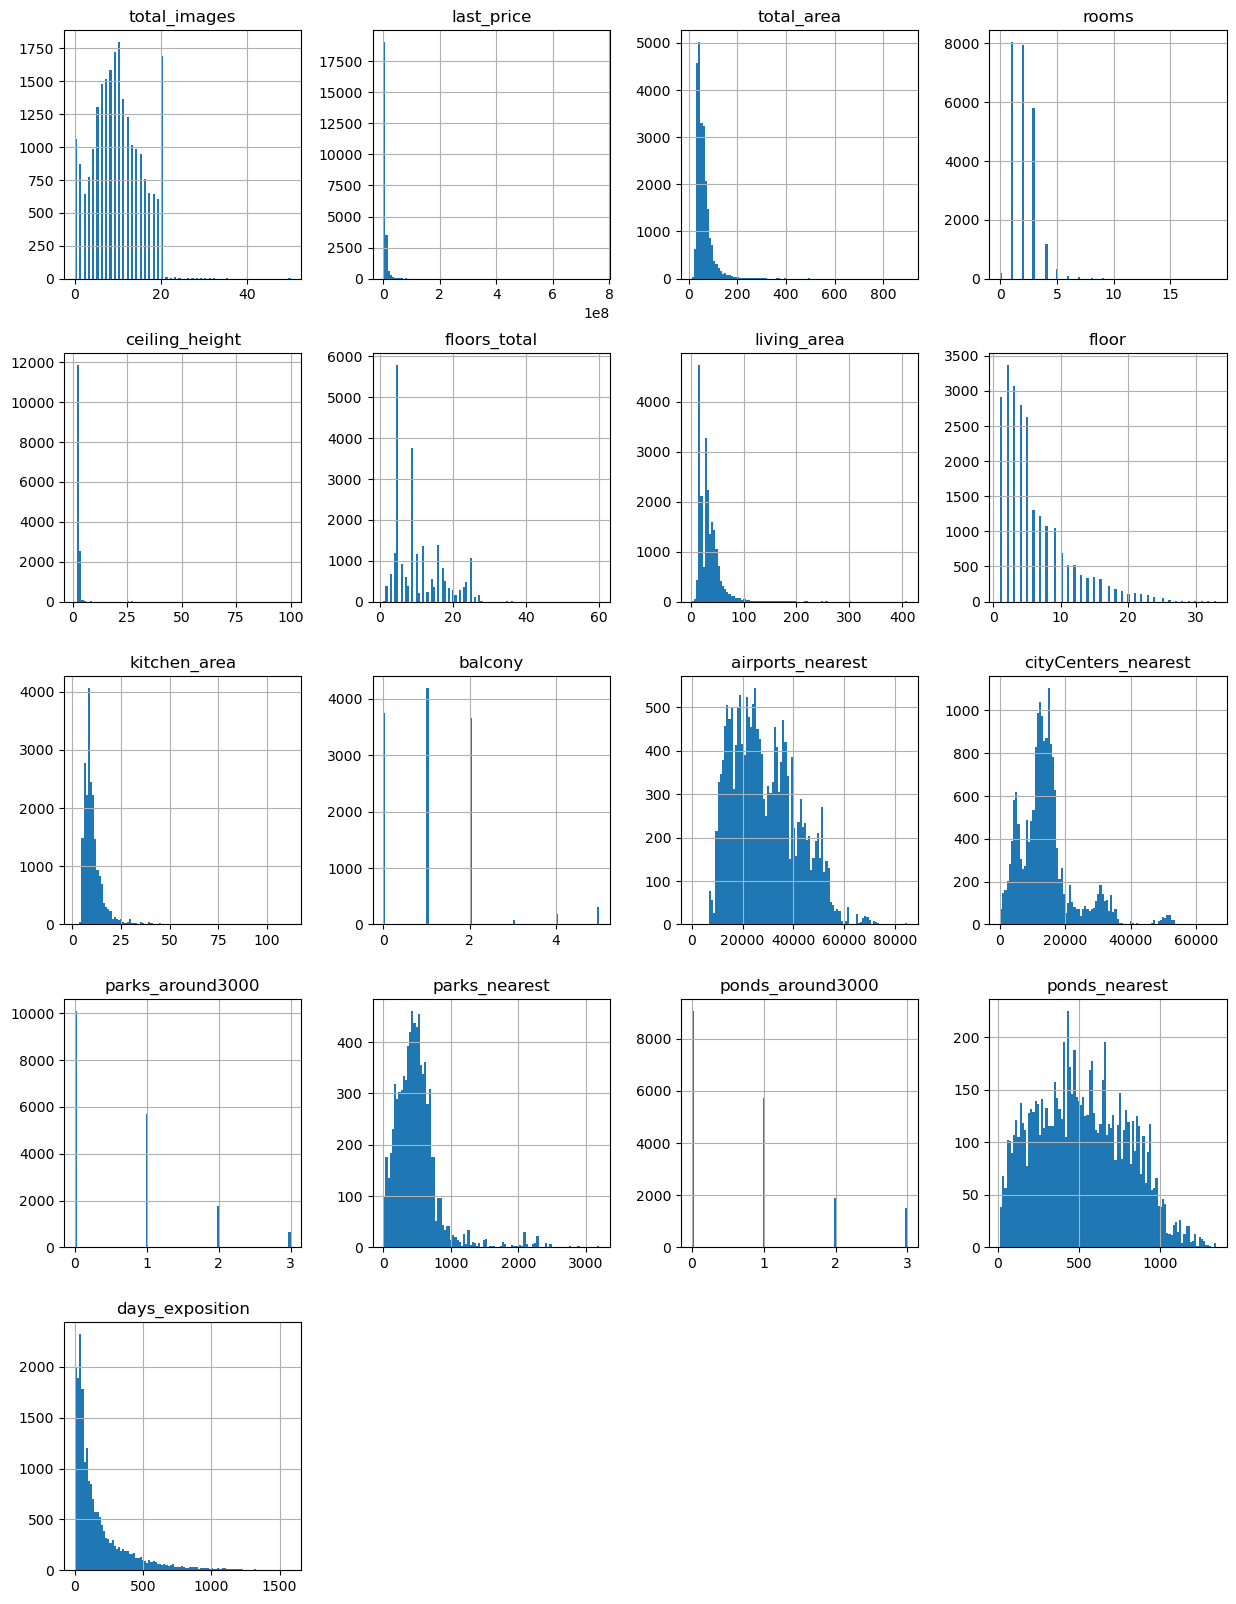

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


In [6]:
def information_df(metod):
    print('Ознакомимся с таблицей. для этого выведем первые 10 строчек датафрейма data на экран.')
    display(metod.head(11))
    print(' ')    
    print('Выведем основную информацию о датафрейме с помощью метода info().')
    display(metod.info())
    print(' ')
    print ('Количество явных дубликатов:', metod.duplicated().sum())
    print(' ')
    print('Выведем на экран гистограммы для всех числовых столбцов таблицы, а также ознакомимся с первоначальными данными методом describe().')
    metod.hist(figsize=(15, 20), bins=100);
    plt.show()
    display(metod.describe())
      
information_df(data)

**Рассмотрев данные исходного датафрейма, можно выделить:**
- более чем, в половине столбцов имеется большое количество пропущенных значений, 
- во многих столбцах огромный разброс значений. 

На основе данных из таблицы, вызванной методом describe(), можно выделить такие столбцы: `'last_price`, `'total_area'`, `'ceiling_height'`, `'living_area'`, `'kitchen_area'`. В них минимальные или максимальные значения явно являются аномальными. Высота потолков не явно не может быть 1 или 100м. Также сложно себе представить квартиру, стоимость которой 12190 рублей, . В столбцах по площади минимальные значения слишком малы и противоречат нормам СНиП.

<a id="start2"></a>
#### Предобработка данных

**Найдем количество пропущенных значений и их долю во всем датафрейме.**

In [7]:
missing_value = data.isna().sum().reset_index()
missing_value['all'] = 23699
missing_value.columns = ['Наименование столбца', 'Количество пропусков', 'Всего значений']
missing_value['Доля пропусков'] = (missing_value['Количество пропусков']/23699).apply('{:.2%}'.format)
missing_value.sort_values(by='Количество пропусков', ascending=False) 

,Наименование столбца,Количество пропусков,Всего значений,Доля пропусков
9,is_apartment,20924,23699,88.29%
18,parks_nearest,15620,23699,65.91%
20,ponds_nearest,14589,23699,61.56%
13,balcony,11519,23699,48.61%
5,ceiling_height,9195,23699,38.80%
15,airports_nearest,5542,23699,23.38%
16,cityCenters_nearest,5519,23699,23.29%
19,ponds_around3000,5518,23699,23.28%
17,parks_around3000,5518,23699,23.28%
21,days_exposition,3181,23699,13.42%


В датафрейме имеется большое количество пропущенных значений. На основании составленной таблицы, пропуски имеются в столбцах с различными типами данных. Для заполнения пропущенных значений необходимо подробнее останавливаться по каждым данным. Все методы, которые будем использовать опишем, непосредственно, во время обработки каждого столбца.

**Рассмотрим столбец `'balcony'`, заполним пропуски, по логике. Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Заменим такие пропуски на 0.**

In [8]:
data['balcony'] = data['balcony'].fillna(0)

**Столбец `'is_apartment'` состоит из 2 значений: `False` и`True`, а следовательно, имеет булев тип данных. Логично предположить, что отсутствие информации в данном параметре, означает, что недвижимость не относится к апартаментам. Данные пропуски заполним параметром `False`**

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

**В датафрейме есть несколько столбцов, которые заполнить логически не получится. Так как в них содержатся картографические значения. Заполнить пропуски медианой или средним значением будет не корректно. А так как пропусков много, и удалять их не целесообразно, заполним их "заглушками"**

**Заполним пропуски в столбце `'airports_nearest'`, используя заглушку `88888`.**

In [10]:
display(data['airports_nearest'].describe())
data['airports_nearest'] = data['airports_nearest'].fillna(88888)

count   18157.00
mean    28793.67
std     12630.88
min         0.00
25%     18585.00
50%     26726.00
75%     37273.00
max     84869.00
Name: airports_nearest, dtype: float64

**Заполним пропуски в столбце `'cityCenters_nearest'`, используя заглушку `666666`.**

In [11]:
display(data['cityCenters_nearest'].describe())
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(666666)

count   18180.00
mean    14191.28
std      8608.39
min       181.00
25%      9238.00
50%     13098.50
75%     16293.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

**Заполним пропуски в столбце `'parks_nearest'`, используя заглушку `2222`.**

In [12]:
display(data['parks_nearest'].describe())
data['parks_nearest'] = data['parks_nearest'].fillna(3333)

count   8079.00
mean     490.80
std      342.32
min        1.00
25%      288.00
50%      455.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

**Заполним пропуски в столбце `'parks_around3000'`, используя заглушку `11`.**

In [13]:
data['parks_around3000'].max()
data['parks_around3000'] = data['parks_around3000'].fillna(11)

**Заполним пропуски в столбце `'ponds_nearest'`, используя заглушку `2222`**

In [14]:
display(data['ponds_nearest'].describe())
data['ponds_nearest'] = data['ponds_nearest'].fillna(2222)

count   9110.00
mean     517.98
std      277.72
min       13.00
25%      294.00
50%      502.00
75%      729.00
max     1344.00
Name: ponds_nearest, dtype: float64

**Заполним пропуски в столбце `'ponds_around3000'`, используя заглушку `11`.**

In [15]:
data['ponds_around3000'].max()
data['ponds_around3000'] = data['ponds_around3000'].fillna(11)

Наличие пропусков в вышеуказанных данных можно объяснить тем, что далеко не в каждом населенном пункте есть аэропорты, парки или пруды. Например, небольшие поселки могут состоять из нескольких улиц, поэтому расстояния до центра, как такового, также не будет.

**Рассмотрим столбец `'locality_name'`.** 

В данном столбце от пропусков избавиться можно только удалением либо заглушкой. Если это возможно, то лучше всегда оставить строки, так как в других столбцах могут содержаться полезные для анализа данные.
Так и поступим здесь.

**Избавимся от пропусков в столбце `'locality_name'`, заполним их значением `'нет информации'`.**

In [16]:
data.loc[data['locality_name'].isna(), 'locality_name'] = \
data.loc[data['locality_name'].isna(), 'locality_name'].fillna('нет информации')

Вероятнее всего небольшое количество пропусков в столбце имеет человеческий фактор, люди, заполнявшие информацию, не указали локацию недвижимости. Или же при выгрузке данных произошел технический сбой по одной или нескольким локациям.

**Рассмотрим столбец `'floors_total'`**

In [17]:
gaps_floors_total = data[data['floors_total'].isna()]
display(gaps_floors_total['floor'].sort_values().unique())
#maa = []
#maa.append(gaps_floors_total.index)#сохраним индексы, чтобы проверить корректность заполнения

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18,
       19, 20, 21, 22, 23, 24], dtype=int64)

Количество пропусков в столбце небольшое. Пропуски можно либо удалить совсем, либо заполнить. Так как имеются данные о этаже квартиры, с его помощью заполним пропуски. Для этого выделим несколько диапазонов многоэтажных домов.
среднеэтажные (1 - 5 этажей);
многоэтажные (6 и более этажей);
повышенной этажности (11 - 16 этажей);
высотные (более 16 этажей)

**Для заполнения пропусков создадим функцию**

In [18]:
def gaps(row):
    try:
        if 1 <= row <= 5:
            return 5
        elif 6 <= row <= 10:
            return 10
        elif 11 <= row <= 16:
            return 16
        else:     
            return 25
    except: 'Error'
data['florik'] = data['floor'].apply(gaps)

In [19]:
data.loc[data['floors_total'].isna(), 'floors_total'] = data.loc[data['floors_total'].isna(), 'florik']
#перенесем новые значения в столбец floors_total

In [20]:
data = data.drop(columns='florik') 

**Заполним пропуски в столбце `'first_day_exposition'`.**

**Примем отсутствие значений в столбце как факт того, что до момента выгрузки датафрейма, что объявления еще не убраны, а следовательно квартиры либо не продались, либо их просто забыли убрать с сайта.**

Для заполнения пропусков найдем максимальную дату.

Найдем количество дней между указанными в столбце `'days_exposition'` датами и максимальной датой. Заполним пропуски.

In [21]:
data['first_day_exposition'].max()

'2019-05-03T00:00:00'

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

In [23]:
for z in data.query('days_exposition.isna()'):
    date = pd.to_datetime('2019-05-03 00:00:00', format='%Y-%m-%d %H:%M:%S')
    data.loc[data['days_exposition'].isna(), 'days_exposition'] =(date - data.loc[data['days_exposition'].isna(), 'first_day_exposition']) / np.timedelta64 ( 1 , 'D')

In [24]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total               0
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

**Основные пропуски датафрейма были заполнены. Оставшиеся столбцы имеют аномалии. Заполним их после того, как избавимся от них.**

**Рассмотрим столбец `'locality_name'`.**

In [25]:
data['locality_name'].sort_values().unique()#выведем на экран все значения, предварительно отсортировав их

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [26]:
data['locality_name'].nunique()#найдем количество уникальных значений в столбце до обработки неявных дубликатов

365

**В столбце имеется большое количество неявных дубликатов, избавимся от уточнений, оставив лишь названия локаций.**

In [27]:
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].replace(
    ['коттеджный ', 'станции ', 'садовое товарищество ', 
     'село ', 'городской ', 'деревня ', 'поселок ', 
     'городского типа ', 'при железнодорожной ', 
     'садоводческое некоммерческое товарищество ', 'Пансионат '], '', regex=True)

In [28]:
data['locality_name'].nunique()#проверим количество уникальных значений после обработки

306

**Ознакомимся с пропусками в столбце `'ceiling_height'`.**

**Данный столбец содержит очень много пропущенных значений. Выведем все уникальные значения.**

In [29]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

В столбце большой диапазон значений, имеются как высокие и низкие аномальные, так и явно выбивающие значения - целые числа. Логично предположить, что на самом деле это вещественные значения. Изучив недвижимость в Санкт-Петербурге, удалось выяснить, что в городе много действительно имеются исторические здания, двухъярусные квартиры, а также жилые комплексы и пентхаусы с крайне высокими потолками. Высота потолков доходит до 10,3м. Именно этого значения и будем придерживаться для обработки аномалий.

**Создадим цикл для устранения аномалий**

In [30]:
for height in data['ceiling_height']:
    if height > 10.3:
        data['ceiling_height'] = data['ceiling_height'].replace({height: height/10})

**Для заполнения пропусков используем медиану. Устраним пропуски отдельно по Санкт-Петербургу и отдельно по Ленинградской области**

In [31]:
spb = data.query('locality_name == "Санкт-Петербург"')
data.loc[data['locality_name'] == "Санкт-Петербург", 'ceiling_height'] = \
data.loc[data['locality_name'] == "Санкт-Петербург", 'ceiling_height'].fillna(spb['ceiling_height'].median())

other = data.query('locality_name != "Санкт-Петербург"')
data.loc[data['locality_name'] != "Санкт-Петербург", 'ceiling_height'] = \
data.loc[data['locality_name'] != "Санкт-Петербург", 'ceiling_height'].fillna(other['ceiling_height'].median())

Пропуски заполнены, однако все еще остались аномально низкие значения. Также хоть в Санкт-Петербурге и имеется недвижимость с необычно высокими потолками, все же для дальнейшего анализа избавимся от выбивающихся значений. Для этого построим диаграмму размаха и изучим получившиеся данные.

В соответствии со СНиП:

- высота внутриквартирных коридоров, холлов, передних, антресолей (и под ними) определяется условиями безопасности передвижения людей и должна составлять не менее 2,1 м.
- высота (от пола до потолка) жилых помещений и кухни (кухни-столовой) в климатических районах IА, IБ, IГ, IД и IVA должна быть не менее 2,7 м, а в других климатических районах - не менее 2,5 м.

В соответствии с этой информацией уберем все значения ниже 2,1 м(минимально допустимая внутриквартирная высота в нежилых помещениях), а также, больше 10,3м (максимальная высота, найденная на просторах сети Интернет, в элитных ЖК Санкт-Петербурга).

In [32]:
data = data.query('2.1 <= ceiling_height <= 10.3')

**Есть еще несколько столбцов, в которых пропущены значения: `kitchen_area` и `living_area`. Количество пропусков достаточно большое, поэтому необходимо их заполнить.**

Для начала разберемся с пропусками площади кухни в студиях, апартаментах и в свободной планировке.

В студиях, апартаментах и свободной планировке, как правило, площадь кухни не указывается, поэтому обработаем пропуски в данном столбце и заполним его значением 0. Выберем все студии, апартаменты и открытые планировки, в которых пропущено значение площади и заменим его на ноль.

In [33]:
data.loc[(data['studio'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
data.loc[(data['studio'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'].fillna(0)

In [34]:
data.loc[(data['open_plan'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
data.loc[(data['open_plan'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'].fillna(0)

In [35]:
data.loc[(data['is_apartment'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
data.loc[(data['is_apartment'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'].fillna(0)

**Перед заполнением пропусков, проверим сколько строк в датафрейме имеют отрицательное значение при вычитании жилой и кухонной площади из общей, а также строки несоответствующие минимально допустимым значениям.**

Площадь помещений в квартирах должна быть не менее: жилого помещения (комнаты) в однокомнатной квартире - 14 м, общего жилого помещения в квартирах с числом комнат две и более - 16 м, спальни - 8 м (10 м - на двух человек); кухни - 8 м; кухонной зоны в кухне-столовой - 6 м. В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м. 
 
В законах нет четкого определения студии. По техническим документам это однокомнатная квартира, поэтому студии строят по тем же нормам. Площадь комнаты должна быть не менее 14 м², кухни — не менее 5 м². А площадь ванной, совмещенной с санузлом, должна быть не меньше 3,5 кв.

**Конечно, застройщики, бывают разные и многие из них могут пренебрегать прописанными нормами, однако для анализа будем придерживаться этих показателей.**

In [36]:
len(data.loc[(((data['total_area']*0.9 - (data['living_area'] + data['kitchen_area'])) < 0) | \
              (data['living_area'] < 14) | ((data['kitchen_area'] < 5) & (data['kitchen_area'] > 0))), 'kitchen_area'])

877

Количество таких строк достаточно большое. Поэтому необходимо убрать аномалии в них.

**Заполним пропуски в столбце жилой площади, вычитая кухню из общей площади с поправочным коэффициентом на нежилые помещения (0,9).**

In [37]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = \
(data.loc[data['kitchen_area'].isna(), 'total_area']*0.9 - \
data.loc[data['kitchen_area'].isna(), 'living_area'])

In [38]:
data.loc[data['living_area'].isna(), 'living_area'] = \
(data.loc[data['living_area'].isna(), 'total_area']*0.9 - \
data.loc[data['living_area'].isna(), 'kitchen_area'])

In [39]:
display(data['living_area'].isna().sum())#количество пропусков жилой площади после обработки
data['kitchen_area'].isna().sum()#количество пропусков площади кухни после обработки

1441

1441

**Количество пропусков сократилось, но они еще есть.**

**Площадь жилых и нежилых помещений в квартире напрямую зависит от общей площади. Поэтому заполним пропуски в столбцах  `kitchen_area` и `living_area` медианным значением на основании данных столбца `'total_area'`.**

In [40]:
for x in data['total_area'].unique():
    data.loc[(data['total_area'] == x) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['total_area'] == x), 'living_area'].median()

In [41]:
for x in data['total_area'].unique():
    data.loc[(data['total_area'] == x) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['total_area'] == x), 'kitchen_area'].median()

In [42]:
data.isna().sum()

total_images             0
last_price               0
total_area               0
first_day_exposition     0
rooms                    0
ceiling_height           0
floors_total             0
living_area             50
floor                    0
is_apartment             0
studio                   0
open_plan                0
kitchen_area            50
balcony                  0
locality_name            0
airports_nearest         0
cityCenters_nearest      0
parks_around3000         0
parks_nearest            0
ponds_around3000         0
ponds_nearest            0
days_exposition          0
dtype: int64

**Заполним оставшуюся часть пропущенных значений таким же способом, что и выше, только уже, основываясь на данных из столбца `'rooms'`.**

In [43]:
for x in data['rooms'].unique():
    data.loc[(data['rooms'] == x) & (data['kitchen_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == x), 'living_area'].median()

In [44]:
for x in data['rooms'].unique():
    data.loc[(data['rooms'] == x) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == x), 'kitchen_area'].median()

In [45]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

**Пропуски заполнены. Теперь разберемся с аномалиями. Заполним их медианой отношения жилой/кухонной площади к общей площади.**

In [46]:
#len(data.loc[(((data['total_area']*0.9 - (data['living_area'] + data['kitchen_area'])) < 0) | \
              #(data['living_area'] < 14) | ((data['kitchen_area'] < 5) & (data['kitchen_area'] > 0))), 'kitchen_area'])
    #проверим насколько увеличилось количество аномалий после заполнения пропусков

In [47]:
for x in data['total_area'].unique():
    data.loc[(((data['total_area']*0.9 - (data['living_area'] + data['kitchen_area'])) < 0) | \
              (data['living_area'] < 14) | ((data['kitchen_area'] < 5) & (data['kitchen_area'] > 0))) & \
             (data['total_area'] == x) & data['kitchen_area']/data['total_area'] , 'kitchen_area'] = \
    data.loc[(data['total_area'] == x), 'kitchen_area'].median()

In [48]:
for x in data['total_area'].unique():
    data.loc[(((data['total_area']*0.9 - (data['living_area'] + data['kitchen_area'])) < 0) | \
              (data['living_area'] < 14) | ((data['kitchen_area'] < 5) & (data['kitchen_area'] > 0))) & 
             (data['total_area'] == x) & data['kitchen_area']/data['total_area'] , 'living_area'] = \
    data.loc[(data['total_area'] == x), 'living_area'].median()

In [49]:
len(data.loc[(((data['total_area']*0.9 - (data['living_area'] + data['kitchen_area'])) < 0) | \
              (data['living_area'] < 14) | ((data['kitchen_area'] < 5) & (data['kitchen_area'] > 0))), 'kitchen_area'])
    #проверим насколько увеличилось количество аномалий после заполнения пропусков

229

К сожалению, избавиться от всех аномальных значений не удалось. Обрабатывать аномалии, значения которых зависят от соседних столбцов непросто. Однако мы значительно их сократили с 877 до 229.

Минусовая сумма кухонной и жилой площади в начале датафрейма говорит о том, что данные заполняются некорректно. Скорее всего это вызвано человеческим фактором. Также большое количество пропусков показывает, что такие параметры, как жилая площадь и площадь кухни указывается продавцами далеко не всегда.

Теперь можем отсеять оставшиеся аномальные данные.


In [50]:
data = data.query('not((total_area*0.9 - (living_area + kitchen_area) < 0) or (total_area < 22.5) or \
(living_area < 14) or (0 < kitchen_area < 5) or (0 > kitchen_area))')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23426 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23426 non-null  int64         
 1   last_price            23426 non-null  float64       
 2   total_area            23426 non-null  float64       
 3   first_day_exposition  23426 non-null  datetime64[ns]
 4   rooms                 23426 non-null  int64         
 5   ceiling_height        23426 non-null  float64       
 6   floors_total          23426 non-null  float64       
 7   living_area           23426 non-null  float64       
 8   floor                 23426 non-null  int64         
 9   is_apartment          23426 non-null  bool          
 10  studio                23426 non-null  bool          
 11  open_plan             23426 non-null  bool          
 12  kitchen_area          23426 non-null  float64       
 13  balcony         

**Столбцов с пропусками больше не осталось, однако, в начале, мы обратили внимание на столбец `'last_price'`, в котором слишком занижено минимальное значение. Рассмотрим его подробнее.**

In [52]:
data.query('((last_price < 500000))')#выведем квартиры, стоимостью 500тыс.руб.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5698,7,450000.00,42.00,2017-07-31,2,2.60,1.00,23.00,1,False,False,False,5.80,0.00,Будогощь,88888.00,666666.00,11.00,3333.00,11.00,2222.00,233.00
6859,6,490000.00,40.00,2017-12-11,1,2.60,5.00,18.00,3,False,False,False,10.00,0.00,Старополье,88888.00,666666.00,11.00,3333.00,11.00,2222.00,43.00
8793,7,12190.00,109.00,2019-03-20,2,2.75,25.00,32.00,25,False,False,False,40.50,0.00,Санкт-Петербург,36421.00,9176.00,1.00,805.00,0.00,2222.00,8.00
9581,7,450000.00,43.40,2018-08-31,2,2.60,5.00,30.30,3,False,False,False,5.50,0.00,Старополье,88888.00,666666.00,11.00,3333.00,11.00,2222.00,96.00
10782,3,490000.00,29.10,2016-05-05,1,2.50,5.00,17.00,5,False,False,False,5.50,0.00,Сланцы,88888.00,666666.00,11.00,3333.00,11.00,2222.00,719.00
14911,5,430000.00,54.00,2018-06-26,2,2.60,3.00,31.00,3,False,False,False,9.00,0.00,Свирь,88888.00,666666.00,11.00,3333.00,11.00,2222.00,44.00
16032,8,480000.00,32.00,2019-01-06,1,2.60,2.00,16.00,1,False,False,False,12.80,0.00,Сланцы,88888.00,666666.00,11.00,3333.00,11.00,2222.00,83.00
16219,14,450000.00,38.50,2018-07-11,2,2.65,2.00,18.25,1,False,False,False,10.15,0.00,Вахнова Кара,88888.00,666666.00,11.00,3333.00,11.00,2222.00,45.00
16274,18,440000.00,40.00,2018-07-10,1,2.60,5.00,18.00,1,False,False,False,10.00,0.00,Старополье,88888.00,666666.00,11.00,3333.00,11.00,2222.00,45.00
17456,7,430000.00,30.40,2019-04-22,1,2.60,2.00,16.00,1,False,False,False,6.00,0.00,Сланцы,88888.00,666666.00,11.00,3333.00,11.00,2222.00,11.00


**Из выведенных данных выделяется квартира в Санкт-Петербурге, с аномально низким значением, даже для поселка.
Уберем строку.**

In [53]:
data = data.query('not(last_price < 400000)')

В конце предобработки данных проверим явные дубликаты.

In [54]:
data.duplicated().sum()#после заполнения всех пропусков и устранения неявных дубликатов, проверим не появились ли явные дубликаты

0

**Переведем столбцы в нужный формат.**

In [55]:
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')

Часто требуется выполнять определенные операции с конкретными типами данных: например, арифметические вычисления на целых или числах с плавающей точкой или поиск символа в строках.

Для дальнейшей работы над датафреймом необходимо изменить тип данных в некоторых столбцах, например:

•	в столбце 'first_day_exposition' был изменен тип данных еще при заполнении пропусков на datetime. Во-первых, данные с датой и временем стоит менять для удобства в работе или, например, для заполнения пропусков.

•	в столбцах 'floors_total' , 'balcony' , 'parks_around3000' , 'ponds_around3000' , 'days_exposition' также был изменен формат данных на int, так как значения, содержащиеся в столбцах относятся к целым числам, для удобства лучше их перевести в этот тип.

In [56]:
data[['last_price', 'total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'airports_nearest', 'cityCenters_nearest',\
      'parks_nearest', 'ponds_nearest']] = \
data[['last_price', 'total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'airports_nearest', 'cityCenters_nearest',\
      'parks_nearest', 'ponds_nearest']].astype('float32')

**Устраним выбросы во всех столбцах датафрейма, необходимых для анализа в дальнейшем.**

In [57]:
display(data.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23425.00,23425.00,23425.00,23425.00,23425.00,23425.00,23425.00,23425.00,23425.00,23425.00,23425.00,23425.00,23425.00,23425.00,23425.00,23425.00,23425.00
mean,9.89,6567593.50,60.62,2.08,2.70,10.66,34.83,5.88,10.47,0.59,42741.73,164824.94,3.01,2361.71,3.13,1567.75,186.31
std,5.69,10889988.00,35.55,1.08,0.24,6.58,22.56,4.87,6.06,0.96,27665.73,275044.50,4.43,1362.56,4.39,846.41,233.58
min,0.00,430000.00,22.50,0.00,2.25,1.00,14.00,1.00,0.00,0.00,0.00,181.00,0.00,1.00,0.00,13.00,0.00
25%,6.00,3450000.00,40.20,1.00,2.60,5.00,19.00,2.00,7.00,0.00,21173.00,10912.00,0.00,600.00,0.00,638.00,43.00
50%,9.00,4650000.00,52.00,2.00,2.70,9.00,30.00,4.00,9.00,0.00,33531.00,14975.00,1.00,3333.00,1.00,2222.00,95.00
75%,14.00,6800000.00,70.00,3.00,2.70,16.00,42.40,8.00,11.85,1.00,53963.00,34619.00,3.00,3333.00,3.00,2222.00,238.00
max,50.00,763000000.00,900.00,19.00,10.30,60.00,507.90,33.00,192.00,5.00,88888.00,666666.00,11.00,3333.00,11.00,2222.00,1618.00


Построим гистограммы.

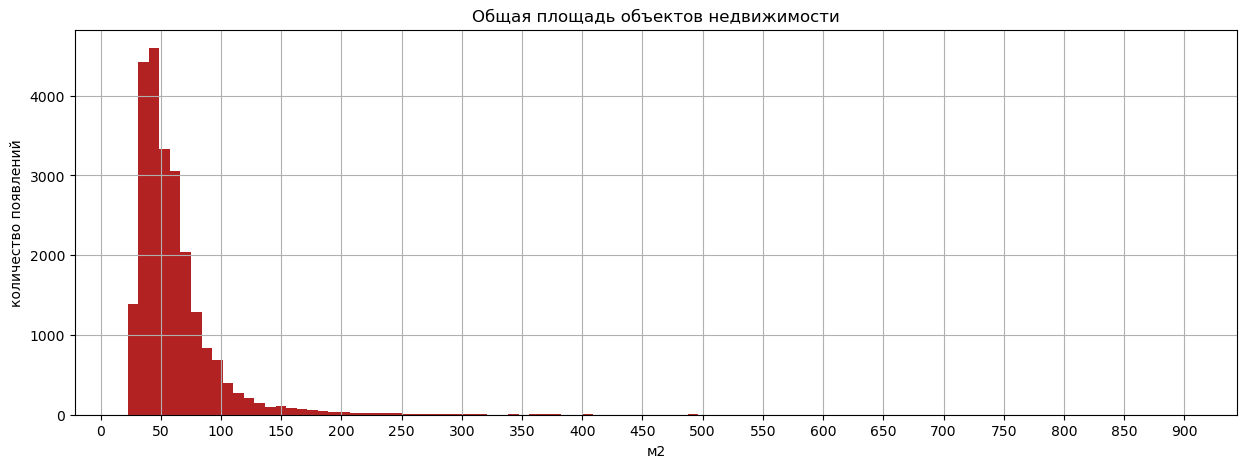

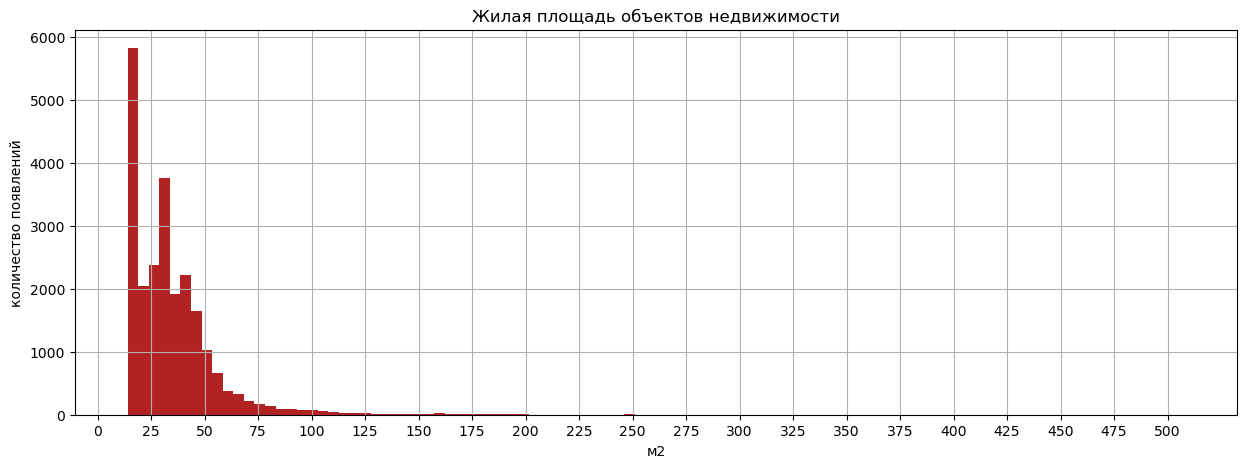

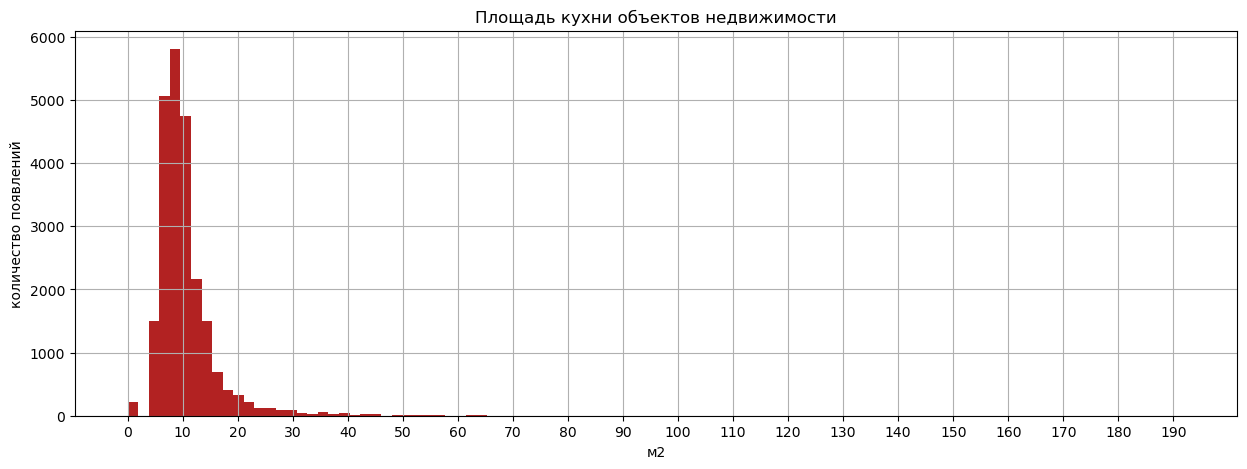

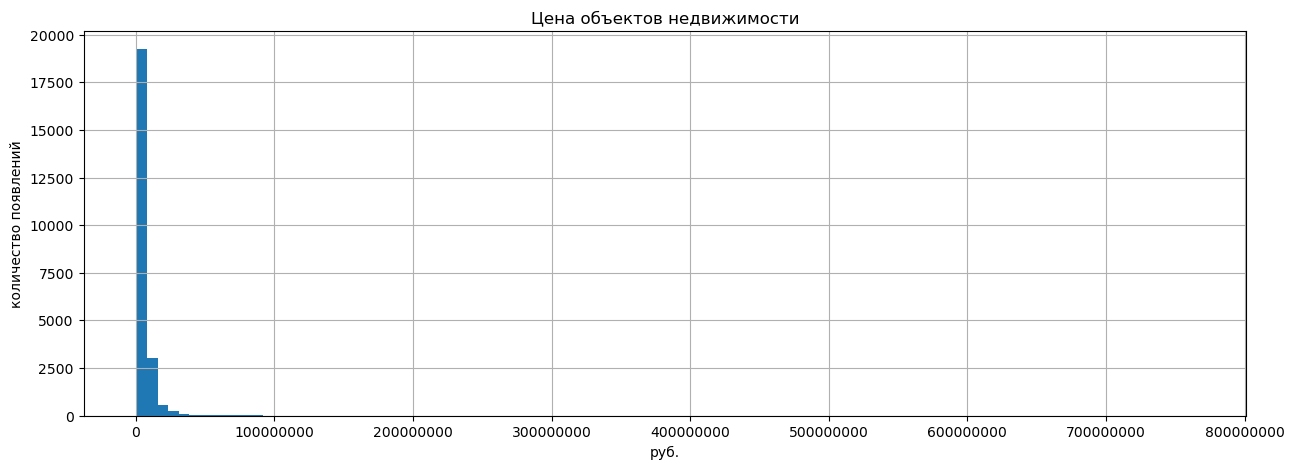

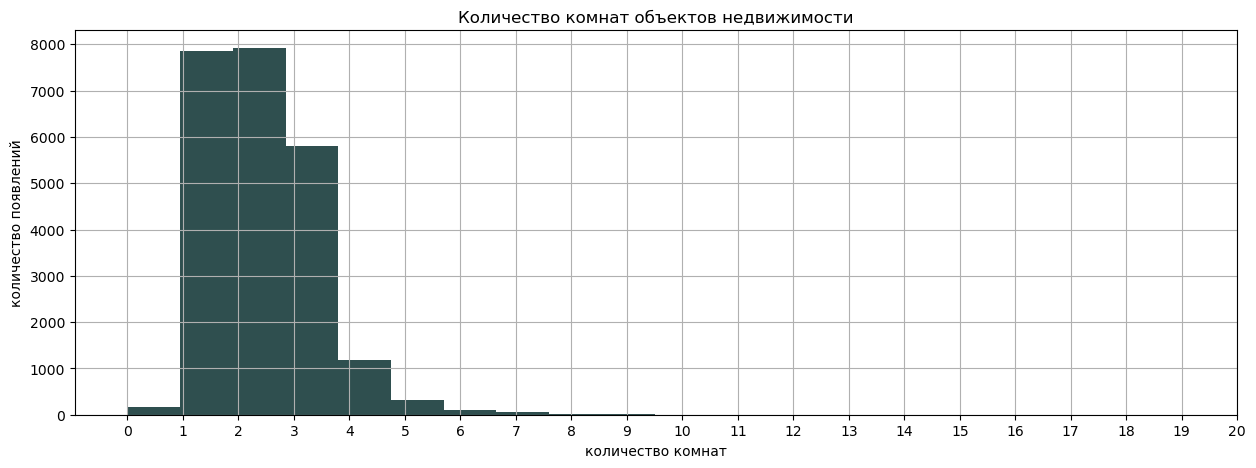

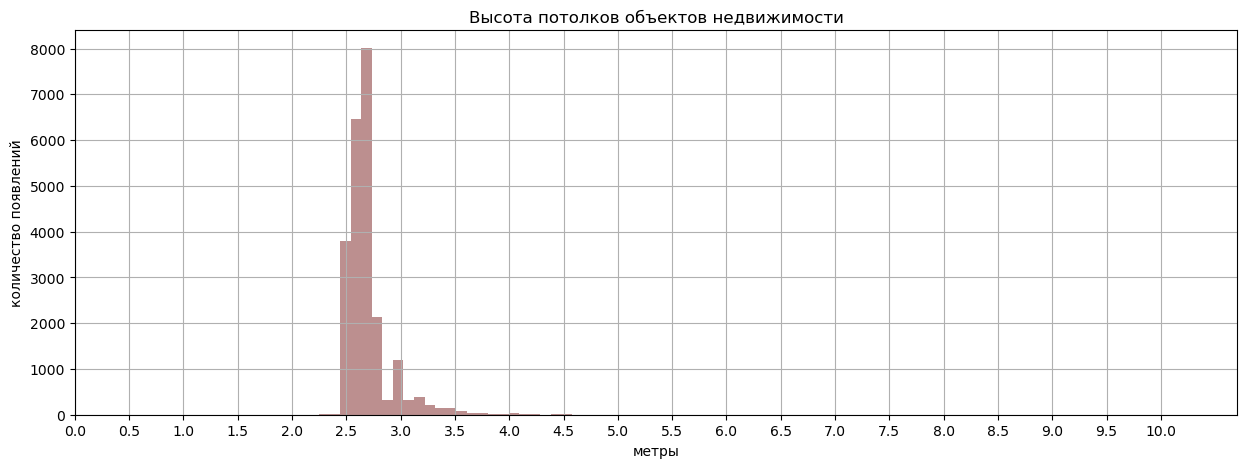

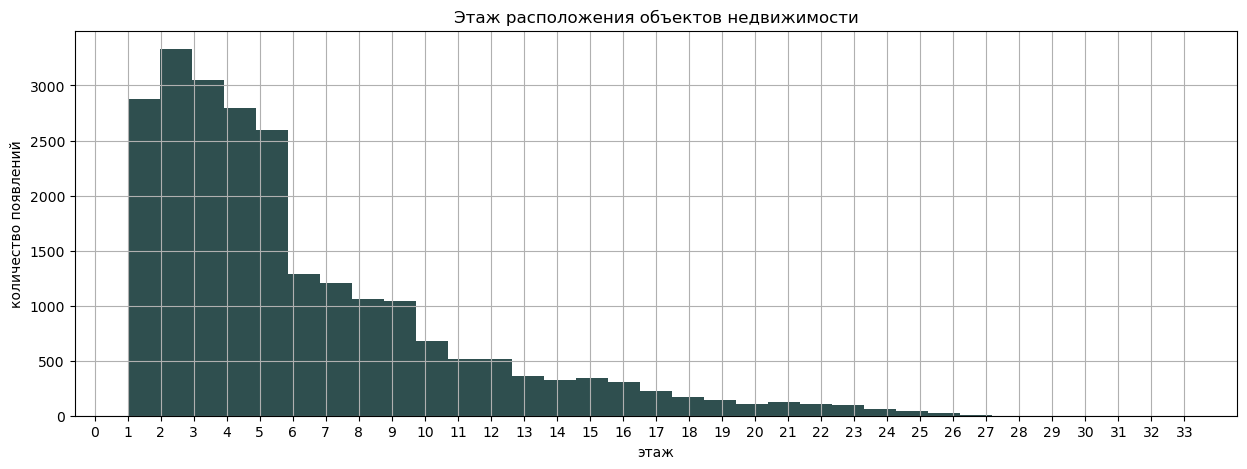

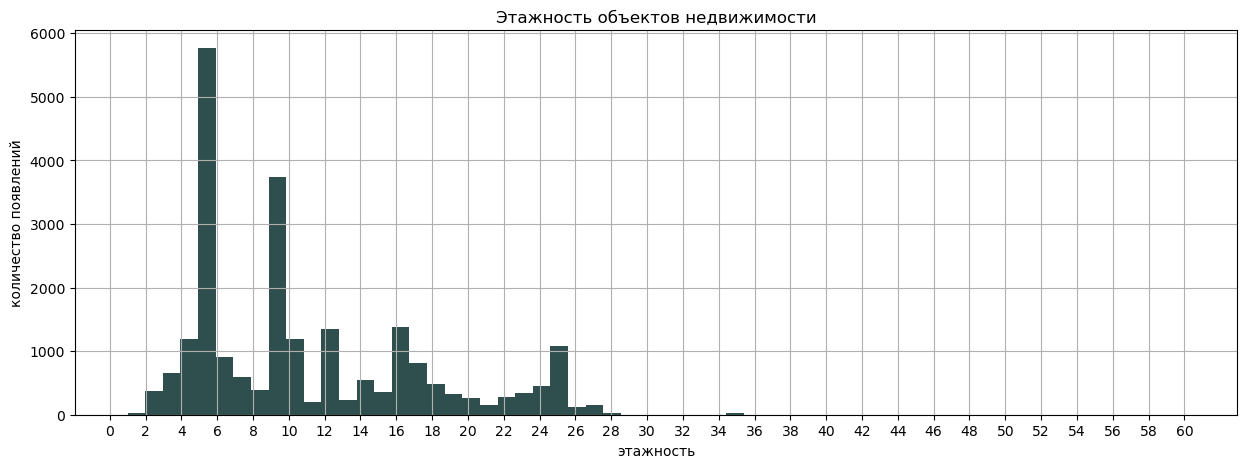

In [58]:
data.hist('total_area', bins = 100, figsize=(15, 5), color='#B22222')
plt.xticks(np.arange(0,950,50));
plt.title(r'Общая площадь объектов недвижимости')
plt.xlabel('м2')
plt.ylabel(r'количество появлений');

data.hist('living_area', bins = 100, figsize=(15, 5), color='#B22222')
plt.xticks(np.arange(0,525,25));
plt.title(r'Жилая площадь объектов недвижимости')
plt.xlabel('м2')
plt.ylabel(r'количество появлений');

data.hist('kitchen_area', bins = 100, figsize=(15, 5), color='#B22222')
plt.xticks(np.arange(0,200,10));
plt.title(r'Площадь кухни объектов недвижимости')
plt.xlabel('м2')
plt.ylabel(r'количество появлений');

data.hist('last_price', bins = 100, figsize=(15, 5))
plt.ticklabel_format(useOffset=False, style='plain');
plt.title(r'Цена объектов недвижимости')
plt.xlabel('руб.')
plt.ylabel(r'количество появлений');

data.hist('rooms', bins = 20, figsize=(15, 5), color='#2F4F4F')
plt.xticks(np.arange(0,21,1));
plt.title(r'Количество комнат объектов недвижимости')
plt.xlabel('количество комнат')
plt.ylabel(r'количество появлений');

data.hist('ceiling_height', bins = 83, figsize=(15, 5), color= '#BC8F8F')
plt.xticks(np.arange(0,10.5,0.5));
plt.title(r'Высота потолков объектов недвижимости')
plt.xlabel('метры')
plt.ylabel(r'количество появлений');

data.hist('floor', bins = 33, figsize=(15, 5), color='#2F4F4F')
plt.xticks(np.arange(0,34,1));
plt.title(r'Этаж расположения объектов недвижимости')
plt.xlabel('этаж')
plt.ylabel(r'количество появлений');

data.hist('floors_total', bins = 60, figsize=(15, 5), color='#2F4F4F')
plt.xticks(np.arange(0,61,2));
plt.title(r'Этажность объектов недвижимости')
plt.xlabel('этажность')
plt.ylabel(r'количество появлений');

По построенным гистограмма можно увидеть, что разброс значений в каждом из столбцов огромен, для того, чтобы дальнейший анализ был более точным, необходимо устранить строки с сильными выбросами. Очень редки квартиры:

- общей площадью выше 200 м2;

- жилой площадью выше 120 м2;

- площадью кухни выше 40 м2;

- стоимостью выше 30 млн.руб;

- количеством комнат выше 8;

- высотой потолков выше 3.8 м;

- находящиеся выше 27 этажа;

- в домах, в которых более 28 этажей. 

**Отфильтруем датафрейм удаляя "хвосты" гистограмм (выбросы)**

In [59]:
data = data.query('total_area <= 200 and living_area <= 120 and kitchen_area <= 40 and last_price <= 30000000 and rooms <= 8\
and ceiling_height <= 3.8 and floors_total <= 28')

data = data.loc[data['floor'] <= 27]

**Отдельно рассмотрим выбросы в столбце `'days_exposition'`.**

count   22780.00
mean      182.46
std       228.13
min         0.00
25%        43.00
50%        93.00
75%       232.00
max      1618.00
Name: days_exposition, dtype: float64

0    45
Name: days_exposition, dtype: int32

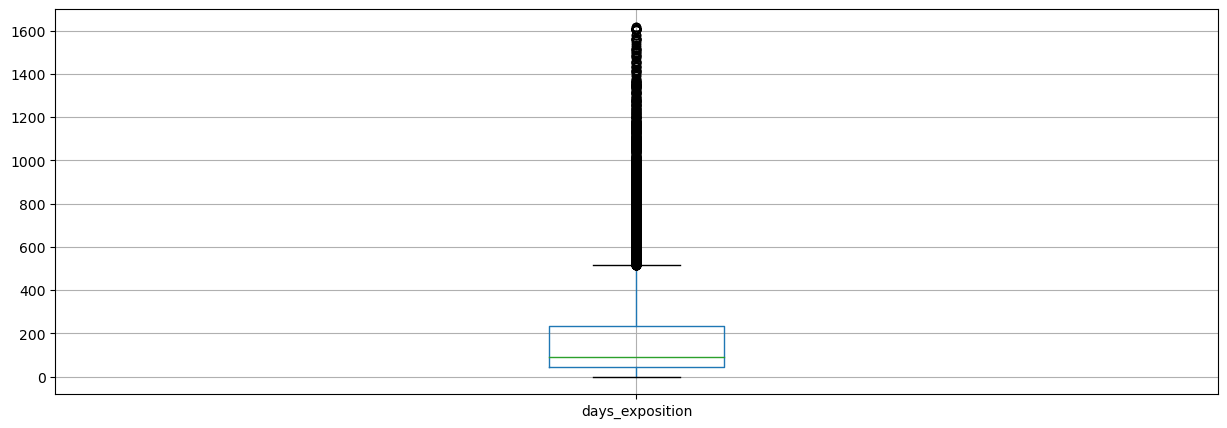

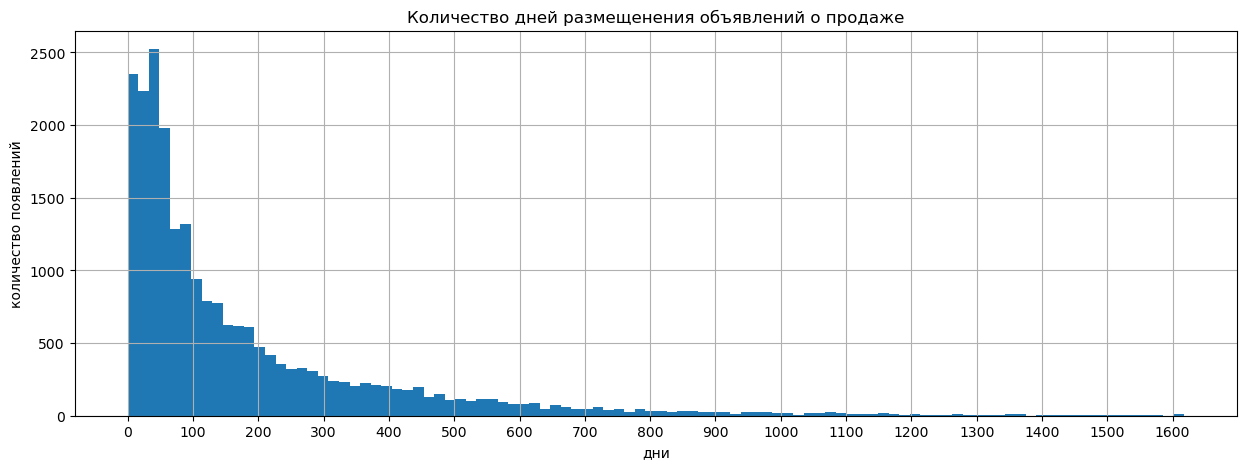

In [60]:
display(data['days_exposition'].describe())
display(data['days_exposition'].mode())

data.boxplot('days_exposition', figsize=(15, 5))

data.hist('days_exposition',bins=100, figsize=(15, 5))
plt.xticks(np.arange(0,1700,100));
plt.title(r'Количество дней размещенения объявлений о продаже')
plt.xlabel('дни')
plt.ylabel(r'количество появлений');
plt.show()

По полученным графикам, можно сказать, что в столбце имеется большой разброс значений, стандартное отклонение составляет - 228.13. Максимальное значение - 1618 дней, что в пересчете на года составляет приблизительно 4.7. Исходя из диаграммы размаха, верхний "ус" приходится приблизительно на 550 дней.

На основании данных диаграммы отсеем все строки, в которых количество дней продажи превышает 730 дней (2 года).

In [61]:
data = data.query('days_exposition <= 730')

**После обработки датафрейма от выбросов, проверим чтобы оставшееся количество строк не было менее, чем 90% от начального объема.**

In [62]:
data.shape[0] / old_data.shape[0]

0.9243849951474746

**Выведем информацию о датафрейме после всех проведенных этапов.**

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21907 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21907 non-null  int64         
 1   last_price            21907 non-null  float32       
 2   total_area            21907 non-null  float32       
 3   first_day_exposition  21907 non-null  datetime64[ns]
 4   rooms                 21907 non-null  int64         
 5   ceiling_height        21907 non-null  float32       
 6   floors_total          21907 non-null  int32         
 7   living_area           21907 non-null  float32       
 8   floor                 21907 non-null  int64         
 9   is_apartment          21907 non-null  bool          
 10  studio                21907 non-null  bool          
 11  open_plan             21907 non-null  bool          
 12  kitchen_area          21907 non-null  float32       
 13  balcony         

***Подводя итог по предобработке данных датафрейма, следует отметить, что были максимально обработаны столбцы с пропущенными значениями, устранены аномальные значения в столбцах ''last_price', 'ceiling_height', 'living_area', 'kitchen_area'. Изменены типы данных. Устранены неявные дубликаты в 'locality_name'. Также из датафрейма были отсеяны все выбросы по столбцам, необходимым для дальнейшего исследования.
Таким образом из 23699 строк осталось 21907 (более 92%).***

<a id="start3"></a>
#### Посчитайте и добавьте в таблицу новые столбцы

**Цена одного квадратного метра `'price_m2'`.**

In [64]:
data['price_m2'] = data['last_price'] / data['total_area']

**День недели публикации объявления (0 — понедельник, 1 — вторник и так далее) - `'weekday'`.**

In [65]:
data['weekday'] = data['first_day_exposition'].dt.weekday

**Месяц публикации объявления - `'month'`.**

In [66]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month 

**Год публикации объявления - `'year'`.**

In [67]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

**Тип этажа квартиры (значения — «‎первый», «последний», «другой») - `'floor_type'`.**

In [68]:
def floor_type(floor):
    try:
        if floor['floor'] == 1:
            return 'первый'
        elif floor['floor'] == floor['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        'ERROR'
        
data['floor_type'] = data.apply(floor_type, axis=1)
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

**Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений) - `'city_centers_nearest_km'`.**

In [69]:
data['city_centers_nearest_km'] = data['cityCenters_nearest']/1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('int')

<a id="analysis"></a> 
### Исследовательский анализ данных.

**Для дальнейшей работы обработанный датафрейм запишем в новую переменную `'filtering_data'`.**

In [70]:
filtering_data = data.loc[:, 'total_images':'city_centers_nearest_km']

**В новом датафрейме уберем столбцы, которые не пригодятся.**

In [71]:
filtering_data = filtering_data.drop(axis=1, columns=['total_images', 'balcony', 'ponds_around3000', 'ponds_nearest', 'parks_around3000'])

<a id="analysis1"></a> 
#### Рассмотрим подробнее каждый параметр объявлений.

**Изучим общую площадь всех представленных объектов.**

count   21907.00
mean       56.80
std        23.91
min        22.50
25%        40.00
50%        51.00
75%        67.00
max       200.00
Name: total_area, dtype: float64

0   45.00
Name: total_area, dtype: float32

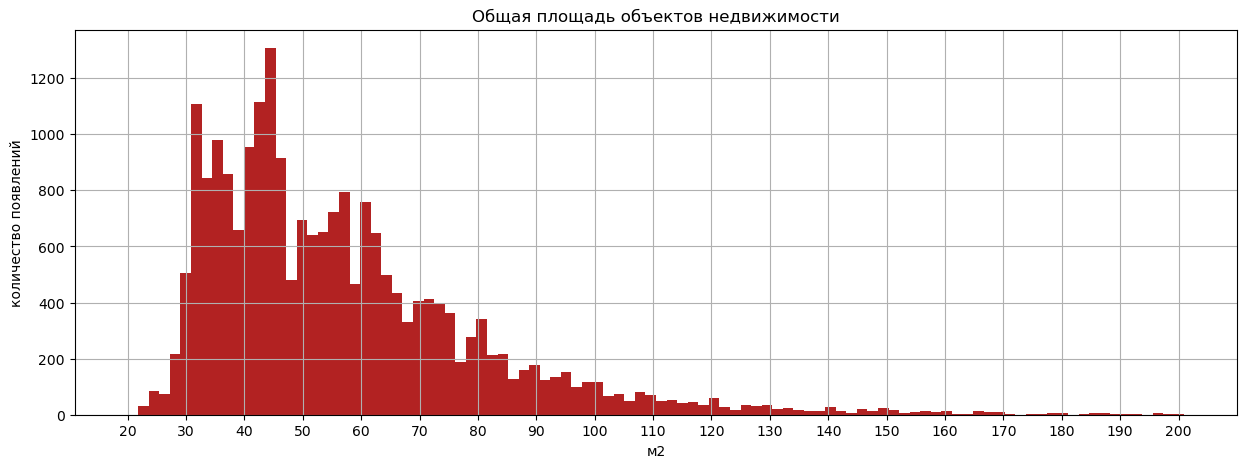

In [72]:
display(filtering_data['total_area'].describe())
display(filtering_data['total_area'].mode())

filtering_data.hist('total_area', bins = 100, range=(20,201), figsize=(15, 5), color='#B22222')
plt.xticks(np.arange(20,201,10));
plt.title(r'Общая площадь объектов недвижимости')
plt.xlabel('м2')
plt.ylabel(r'количество появлений');

Рассмотрев данные по столбцу и гистограмме, можно отметить следующее: минимальная площадь квартиры - 22.5, максимальная - 200 м2. Гистограмма имеет мультимодальное распределение, смещенное вправо: среднее (56.8 м2), медиана (51.00 м2). Мода столбца - 45 м2.

На основе полученной гистограммы можно выявить, что наиболее популярны квартиры, общей площадью от 29 до 65 м2. Наиболее количество значений датафрейма приходится на квартиры, общая площадь которых равна 45м2.

**Изучим жилую площадь всех представленных объектов.**

count   21907.00
mean       32.64
std        15.86
min        14.00
25%        18.60
50%        30.00
75%        41.30
max       120.00
Name: living_area, dtype: float64

0   18.00
Name: living_area, dtype: float32

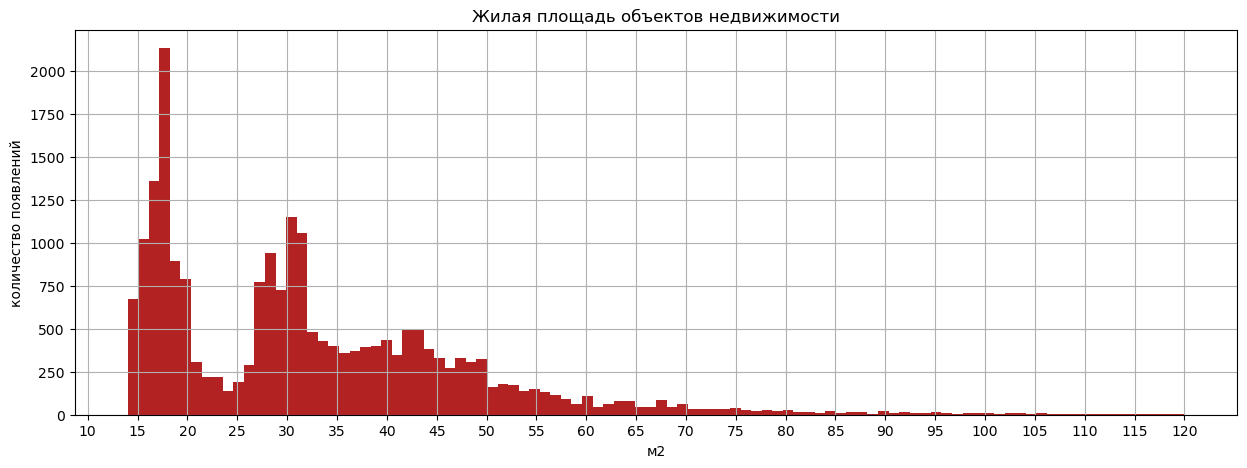

In [73]:
display(filtering_data['living_area'].describe())
display(filtering_data['living_area'].mode())

filtering_data.hist('living_area', bins =100, figsize=(15, 5), color='#B22222')
plt.xticks(np.arange(10,121,5));
plt.title(r'Жилая площадь объектов недвижимости')
plt.xlabel('м2')
plt.ylabel(r'количество появлений');

Рассмотрев данные по столбцу и гистограмме, можно отметить следующее: минимальная жилая площадь квартиры - 14, максимальная - 120 м2. Гистограмма имеет бимодальное распределение,  смещенное вправо: среднее (32.64 м2), медиана (30 м2). Мода столбца - 18 м2.

На гистограмме можно увидеть, что при значениях площади от 21 до 26 м2 имеется провал. Так как данный провал присутствовал и до заполнения пропущенных значений, следовательно, природа его появления вызвана изначально записанными данными датафрейма. Можно предположить, что такое распределение могло получиться при анализе первичной и вторичной недвижимости, так как планировки "хрущевок" будут значительно отличаться от "новостроек-студий". 
После 32м2 диаграмма идет на спад. Мода столбца равна 18м2, второй пик значений после провала приходится на 30м2.

**Изучим площадь кухни всех представленных объектов.**

count   21907.00
mean        9.95
std         4.47
min         0.00
25%         7.00
50%         9.00
75%        11.30
max        40.00
Name: kitchen_area, dtype: float64

0   10.00
Name: kitchen_area, dtype: float32

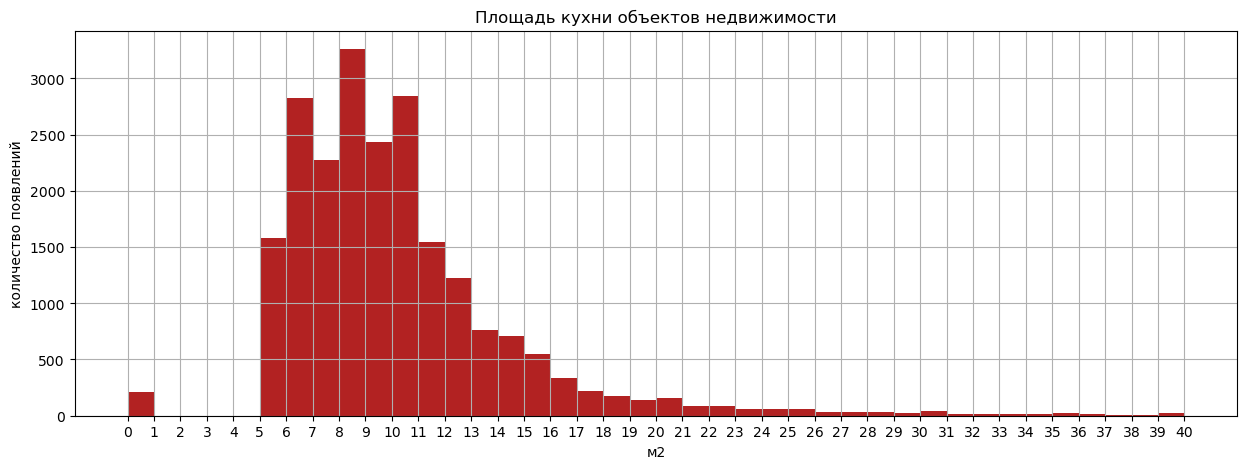

In [74]:
display(filtering_data['kitchen_area'].describe())
display(filtering_data['kitchen_area'].mode())

filtering_data.hist('kitchen_area', bins = 40, figsize=(15, 5), color='#B22222')
plt.xticks(np.arange(0,41,1));
plt.title(r'Площадь кухни объектов недвижимости')
plt.xlabel('м2')
plt.ylabel(r'количество появлений');

Рассмотрев данные по столбцу и гистограмме, можно отметить следующее: минимальная площадь кухни в квартире - 0, максимальная - 40 м2. Гистограмма имеет мультимодальный тип распределения, смещенное вправо: среднее (9.95 м2), медиана (9 м2). Мода столбца - 10 м2.

Для того, чтобы конкретенее рассмотреть моды, изменим количество корзин увеличив их до 400 и выведем новую гистограмму.

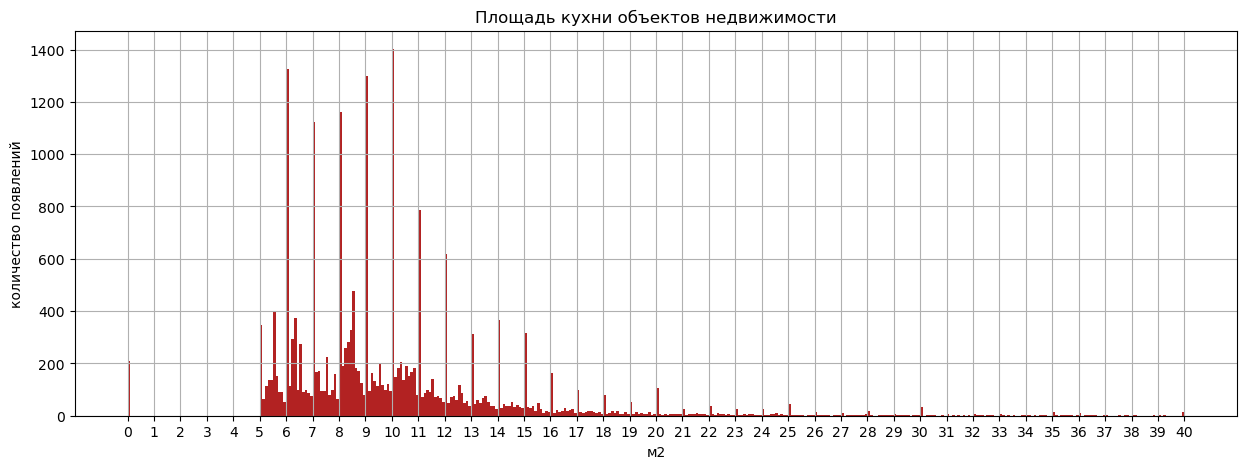

In [75]:
filtering_data.hist('kitchen_area', bins = 400, figsize=(15, 5), color='#B22222')
plt.xticks(np.arange(0,41,1));
plt.title(r'Площадь кухни объектов недвижимости')
plt.xlabel('м2')
plt.ylabel(r'количество появлений');

Структура гистограммы не изменилась и также имеет мультимодальное распределение. Однако теперь можно отчетливо увидеть значения вершин, а также выделить моду столбца - 10 м2. Также среди выделяющихся пиковых значений можно отметить: 6, 7, 8, 9. А вначале гистограммы выделяется значение, равное 0, которое было присвоено квартирам, которые не имеют отдельно кухонной площади, а лишь выделенную мокрую зону. 

Мультимодальное распределение может означать, что распределение в данных не является нормальным и выборка не является однородной, а наблюдения порождены двумя или более распределениями. Вероятно, что при заполнении площади кухни, большинство владельцев указывали округленное до целых значение, хотя сайтом предусмотрено и заполнение десятичным вариантом.

**Изучим цену объектов недвижимости датафрейма.**

count      21907.00
mean     5561083.00
std      3706484.50
min       430000.00
25%      3400000.00
50%      4550000.00
75%      6500000.00
max     30000000.00
Name: last_price, dtype: float64

0   4500000.00
Name: last_price, dtype: float32

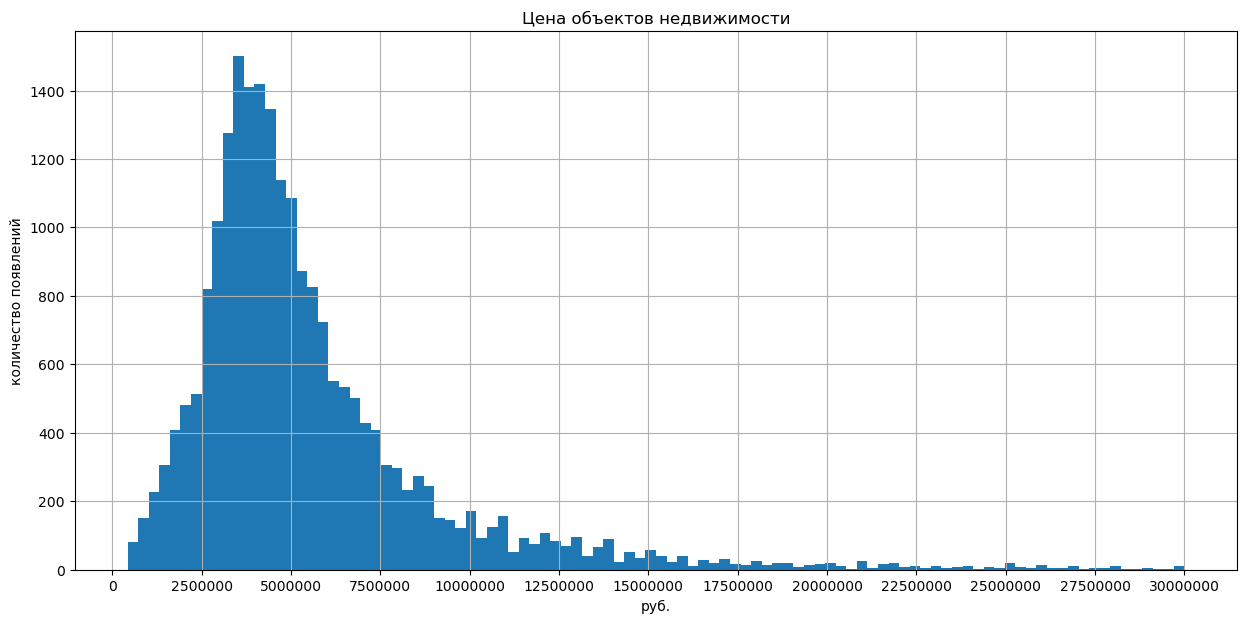

In [76]:
display(filtering_data['last_price'].describe())
display(filtering_data['last_price'].mode())

filtering_data.hist('last_price', bins = 100, figsize=(15, 7))
plt.xticks(np.arange(0,31000000,2500000));
plt.ticklabel_format(useOffset=False, style='plain')
plt.title(r'Цена объектов недвижимости')
plt.xlabel('руб.')
plt.ylabel(r'количество появлений');

Рассмотрев данные по столбцу и гистограмме, можно отметить следующее: минимальная цена объекта недвижимости - 430000 руб., максимальная - 30 млн. руб. Гистограмма имеет островершинное распределение, c правосторонней асимметрией: среднее (5561083.00 руб.), медиана (4550000.00 руб.). Мода столбца - 4.5 млн.руб.

По данным гистограммы можно отметить, что она имеет достаточно высокий подъем и спуск, и лишь после 8.75 млн.руб. снижение происходит более плавно, но не без выраженных скачков. Первый выраженный пик можно заметить на отметке, приблизительно, 2,5- 3 млн.руб.

**Изучим количество комнат объектов недвижимости датафрейма.**

count   21907.00
mean        2.01
std         0.96
min         0.00
25%         1.00
50%         2.00
75%         3.00
max         8.00
Name: rooms, dtype: float64

0    1
Name: rooms, dtype: int64

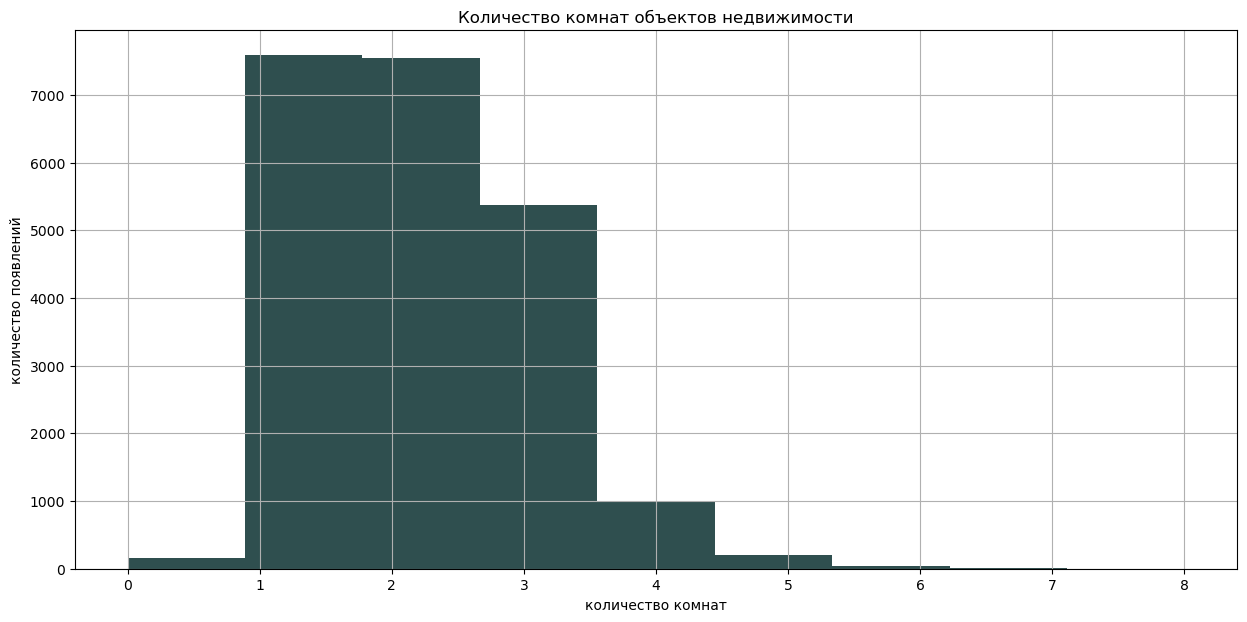

In [77]:
display(filtering_data['rooms'].describe())
display(filtering_data['rooms'].mode())

filtering_data.hist('rooms', bins=9, figsize=(15, 7), color='#2F4F4F')
plt.xticks(np.arange(0,9,1));
plt.title(r'Количество комнат объектов недвижимости')
plt.xlabel('количество комнат')
plt.ylabel(r'количество появлений');

Рассмотрев данные по столбцу и гистограмме, можно отметить следующее: минимальное количество комнат в квартире - 0, максимальное - 8. Распределение скошено вправо: среднее (2), медиана (2). Мода столбца - 1.

На основании представленной гистограммы самыми популярными являются квартиры с 1-2 комнатами, немного реже с 3 комнатами. Значение в 0 комнат обычно присваивается студиям или квартирам со свободной планировкой несмотря на то, что такие квартиры стали очень популярны за последние годы, в нашем датафрейме их объем очень мал. Возможно, это вызвано неверно указанными данными пользователей, например, студии могут указываться как однокомнатные квартиры, а возможно их количество и в правду значительно уступает 1,2,3 и 4 комнатным квартирам.

**Изучим высоту потолков объектов недвижимости датафрейма.**

count   21907.00
mean        2.69
std         0.18
min         2.25
25%         2.60
50%         2.70
75%         2.70
max         3.80
Name: ceiling_height, dtype: float64

0   2.70
Name: ceiling_height, dtype: float32

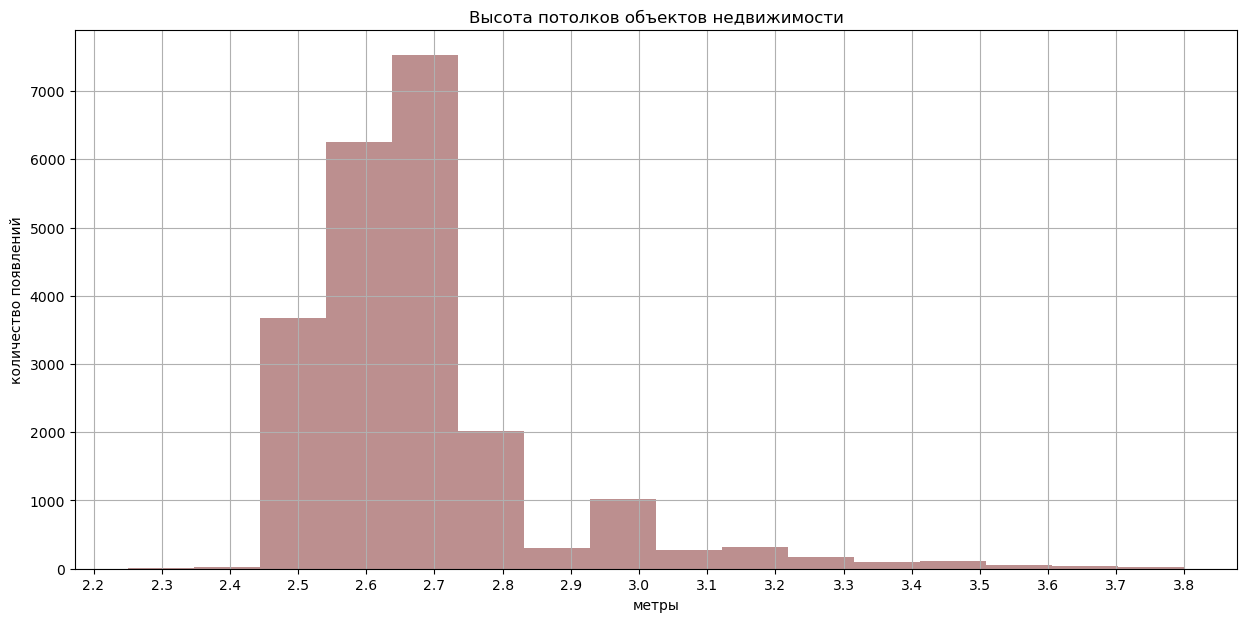

In [78]:
display(filtering_data['ceiling_height'].describe())
display(filtering_data['ceiling_height'].mode())

filtering_data.hist('ceiling_height', bins=16, figsize=(15, 7), color= '#BC8F8F')
plt.xticks(np.arange(2.2,3.9,0.1));
plt.title(r'Высота потолков объектов недвижимости')
plt.xlabel('метры')
plt.ylabel(r'количество появлений');

Рассмотрев данные по столбцу и гистограмме, можно отметить следующее: минимальная высота потолков в квартире - 2,25, максимальная - 3.8 м. Гистограмма имеет островершинное распределение, скошенное вправо: среднее (2.69 м) медиана (2,7 м). Мода столбца - 2.7 м.

На гистограмме можно заметить выраженный пик значений на отметке 2,7. Также большую долю по высоте потолков в датафрейме занимают потолки в 2,5м и 2,6м. Так как изначально в датафрейме присутствовало много пропусков в данном столбце и заполнены они были медианным значением (2,7 по Санкт-Петербургу, 2,6 по остальным локациям), такое распределение вполне предсказуемо. Однако стоит еще выделить потолки высотой 2,8 и 3,0, они значительно меньше по объему, чем предыдущие значения, однако отчетливо видны на гистограмме - это лидеры среди высоких потолков.

**Изучим этаж квартиры объектов недвижимости датафрейма.**

count   21907.00
mean        5.90
std         4.87
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        27.00
Name: floor, dtype: float64

0    2
Name: floor, dtype: int64

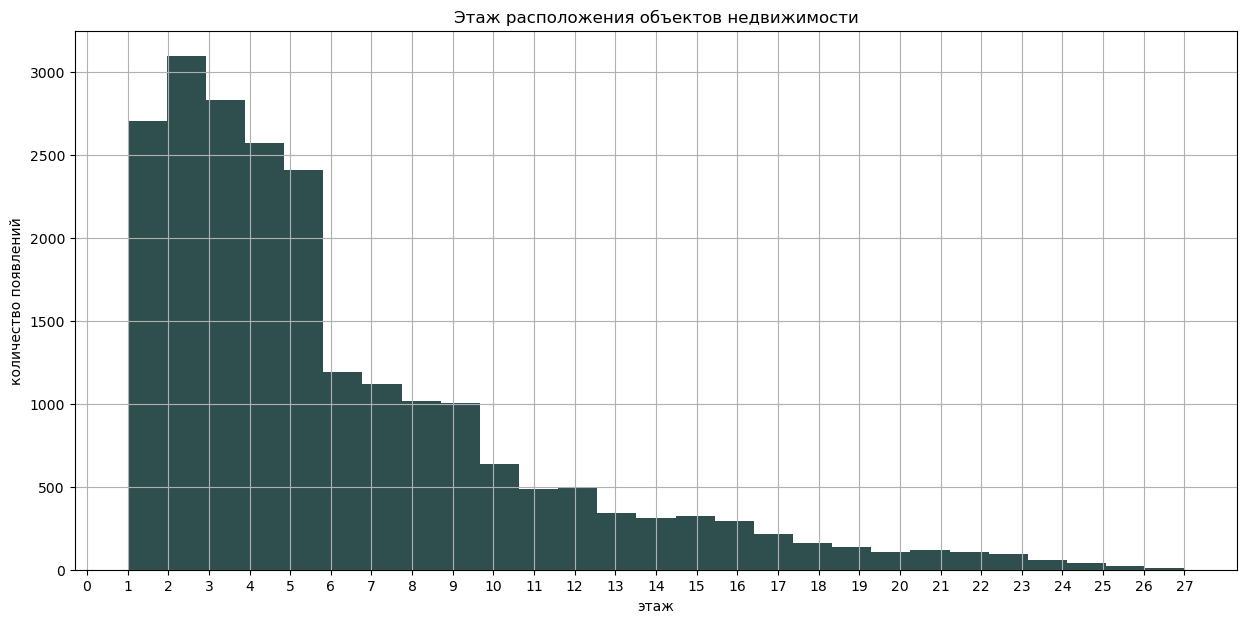

In [79]:
display(filtering_data['floor'].describe())
display(filtering_data['floor'].mode())

filtering_data.hist('floor', bins=27, figsize=(15, 7), color='#2F4F4F')
plt.xticks(np.arange(0,28,1));
plt.title(r'Этаж расположения объектов недвижимости')
plt.xlabel('этаж')
plt.ylabel(r'количество появлений');

Рассмотрев данные по столбцу и гистограмме, можно отметить следующее: минимальный этаж, на котором располагаются объекты недвижимости - 1, максимальный - 27. Распределение скошено вправо: среднее (6) медиана (4). Мода столбца - 2.

На гистограмме видно, что самыми популярными этажами являются 2 и 3. После 5 этажа происходит резкое падение, далее при увеличении этажа, уменьшается их количество, то есть наблюдается обратная зависимость.

**Изучим общее количество этажей в доме объектов недвижимости датафрейма.**

count   21907.00
mean       10.74
std         6.55
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        28.00
Name: floors_total, dtype: float64

0    5
Name: floors_total, dtype: int32

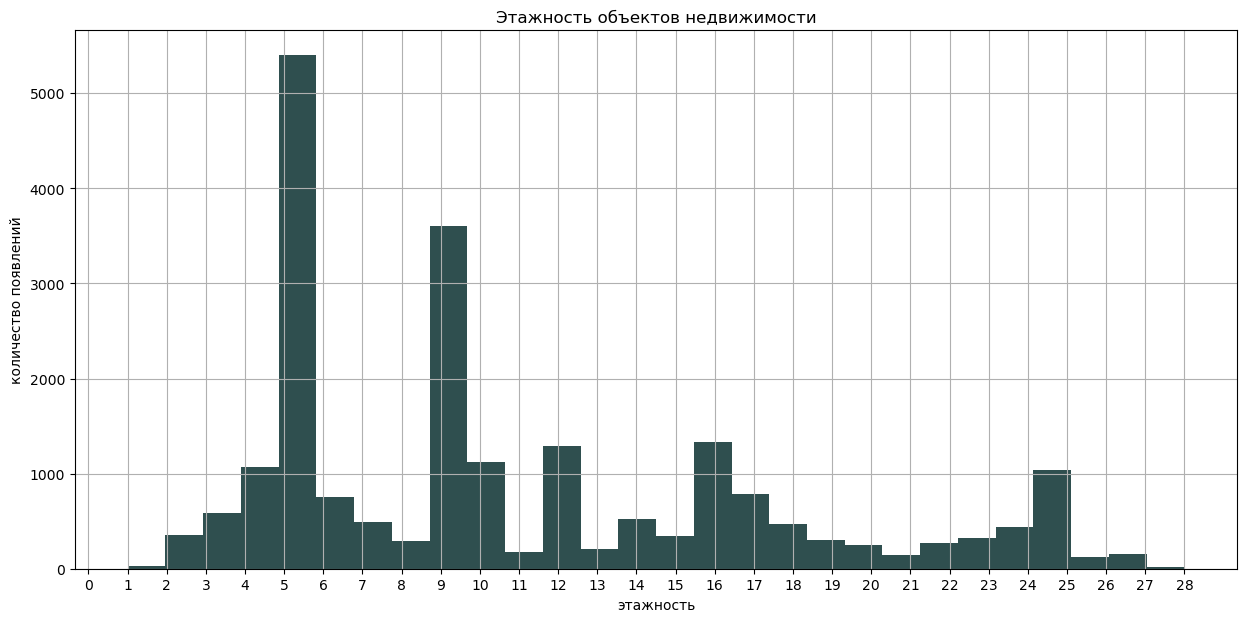

In [80]:
display(filtering_data['floors_total'].describe())
display(filtering_data['floors_total'].mode())

filtering_data.hist('floors_total', bins=28, figsize=(15, 7), color='#2F4F4F')
plt.xticks(np.arange(0,29,1));
plt.title(r'Этажность объектов недвижимости')
plt.xlabel('этажность')
plt.ylabel(r'количество появлений');

Рассмотрев данные по столбцу и гистограмме, можно отметить следующее: минимальная этажность объектов недвижимости - 1, максимальная - 28. Распределение скошено вправо: среднее (11) медиана (9). Мода столбца - 5.

Гистограмма имеет вид многомодального распределения. Самые многочисленные объекты в 5 этажей. Далее этажность многоквартирных домов увеличивается, а их количество снижается. Также происходит небольшой пик в диапазоне 9-ти этажных объектов.

**Изучим тип этажа квартиры («первый», «последний», «другой») объектов недвижимости датафрейма.**

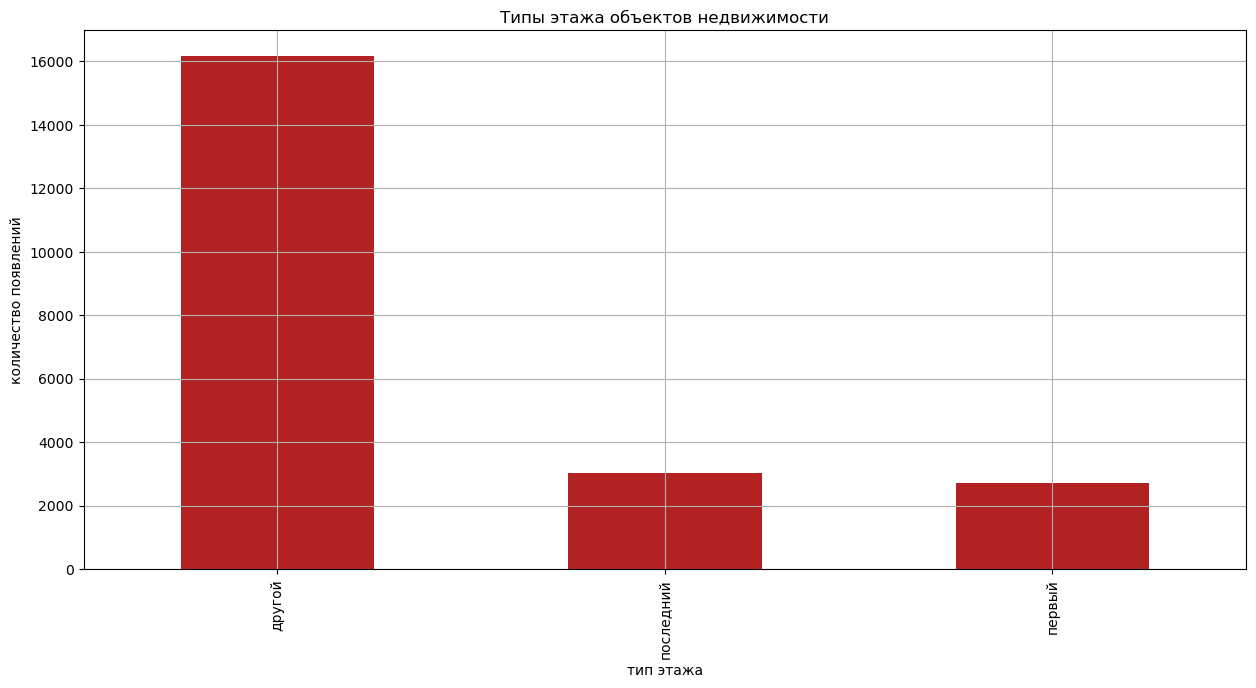

In [81]:
filtering_data['floor_type'].value_counts().plot(kind='bar', color='#B22222', grid=True, figsize=(15, 7));
plt.title(r'Типы этажа объектов недвижимости')
plt.xlabel('тип этажа')
plt.ylabel(r'количество появлений');

На гистограмме представлены 3 вида значений, и с уверенностью, можно сказать, что лидирующую позицию занимают квартиры, этаж которых является не первым и не последним, что в общем-то логично, так как такие квартиры в многоэтажных домах преобладают в разы. Если рассмотреть и сравнить последние и первые этажи, то с небольшим отрывом, количество последних больше. Возможно, это вызвано тем, что некоторые здания отдают первые этажи под коммерцию, а возможно для покупателей первый этаж является наименее привлекательным при приобретении недвижимости.

**Изучим день и месяц публикации объявления объектов недвижимости датафрейма.**

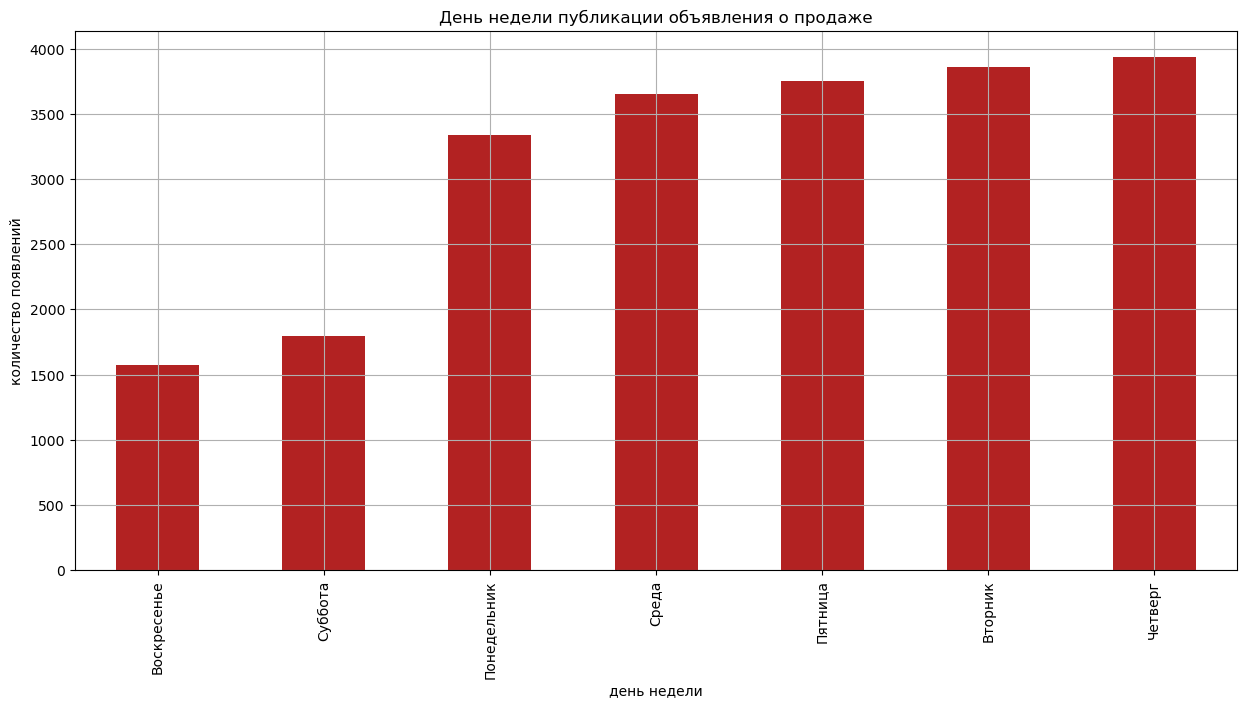

In [82]:
filtering_data['weekday']\
.replace({0:'Понедельник', 1:'Вторник', 2:'Среда', 3:'Четверг', 4:'Пятница', 5:'Суббота', 6:'Воскресенье'})\
.value_counts().sort_values().plot(kind='bar', color='#B22222', grid=True, figsize=(15, 7));
plt.title(r'День недели публикации объявления о продаже')
plt.xlabel('день недели')
plt.ylabel(r'количество появлений');

От дня недели покупка или продажа жилья напрямую зависеть никак не будет. Однако логично, что в субботу и воскресенье количество выставленных объявлений будет ниже, так как это выходные дни и продавцы, риелторы и представители застройщиков будут отдыхать и заниматься своими делами. наибольшее количество объявлений, на основании сформированной гистограммы, приходится на четверг, чуть реже - вторник. Середина недели, среда, расположилась в центре гистограммы и почетно занимает это место.

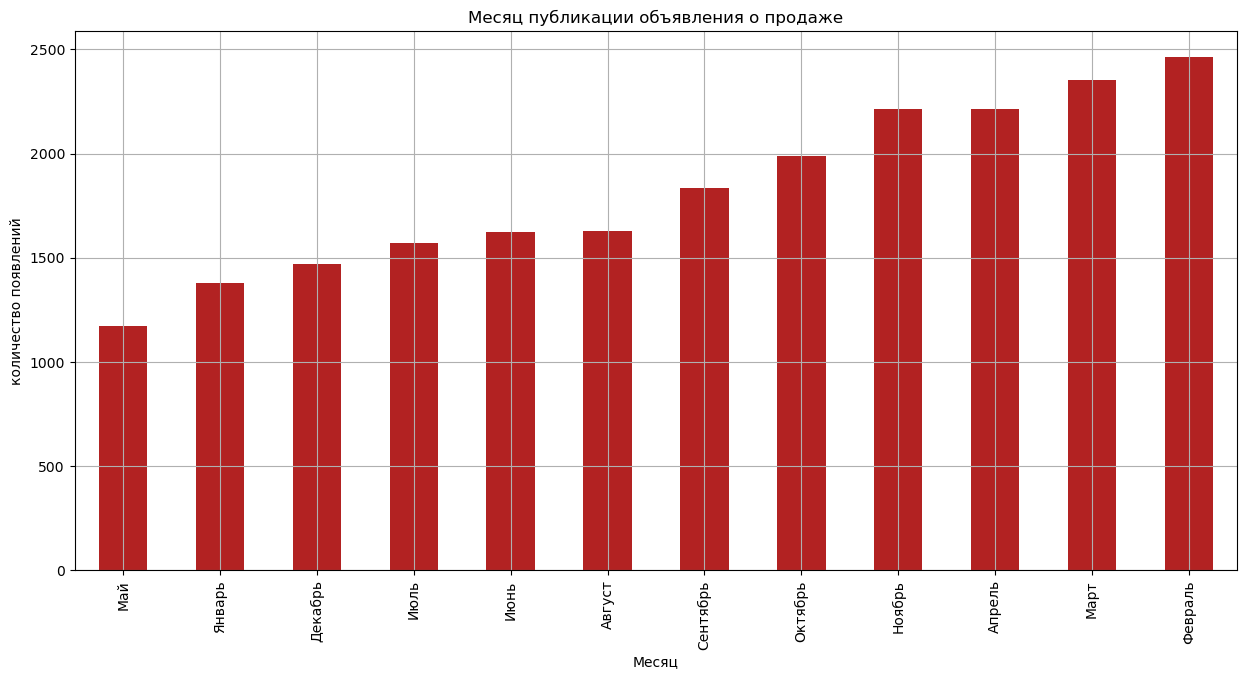

In [83]:
filtering_data['month']\
.replace({1:'Январь', 2:'Февраль', 3:'Март', 4:'Апрель', 5:'Май', 6:'Июнь', 7:'Июль', 8:'Август', \
          9:'Сентябрь', 10:'Октябрь', 11:'Ноябрь', 12:'Декабрь'})\
.value_counts().sort_values().plot(kind='bar', color='#B22222', grid=True, figsize=(15, 7));
plt.title(r'Месяц публикации объявления о продаже')
plt.xlabel('Месяц')
plt.ylabel(r'количество появлений');

Изучив гистограмму распределения дня недели публикации объявлений о продаже недвижимости можно сделать вывод о том, что в январе спрос на квартиры падает, люди отдыхают, то же самое касается майских праздников и летних каникул с июля. В сентябре-октябре, после окончания сезона отпусков, начинает расти спрос на объекты недвижимости, и интерес к ним сохраняется до начала новогодних каникул. Лучшее время для выхода на рынок – февраль-апрель и сентябрь-ноябрь.

**Рассмотрим значения в столбцах: расстояние до центра города в метрах;расстояние до ближайшего аэропорта;расстояние до ближайшего парка.**

In [84]:
airports_nearest = filtering_data.query('airports_nearest != 88888')
cityCenters_nearest = filtering_data.query('cityCenters_nearest != 666666')
parks_nearest = filtering_data.query('parks_nearest != 3333')

display(airports_nearest['airports_nearest'].describe())
display(airports_nearest['airports_nearest'].mode())

display(cityCenters_nearest['cityCenters_nearest'].describe())
display(cityCenters_nearest['cityCenters_nearest'].mode())

display(parks_nearest['parks_nearest'].describe())
display(parks_nearest['parks_nearest'].mode())

count   16698.00
mean    28903.54
std     12812.26
min         0.00
25%     18396.00
50%     26995.00
75%     37434.00
max     84853.00
Name: airports_nearest, dtype: float64

0   37434.00
Name: airports_nearest, dtype: float32

count   16718.00
mean    14495.88
std      8503.78
min       208.00
25%      9858.50
50%     13277.00
75%     16425.00
max     65952.00
Name: cityCenters_nearest, dtype: float64

0   8460.00
Name: cityCenters_nearest, dtype: float32

count   7240.00
mean     492.36
std      339.32
min        1.00
25%      289.75
50%      456.00
75%      613.25
max     3190.00
Name: parks_nearest, dtype: float64

0   441.00
Name: parks_nearest, dtype: float32

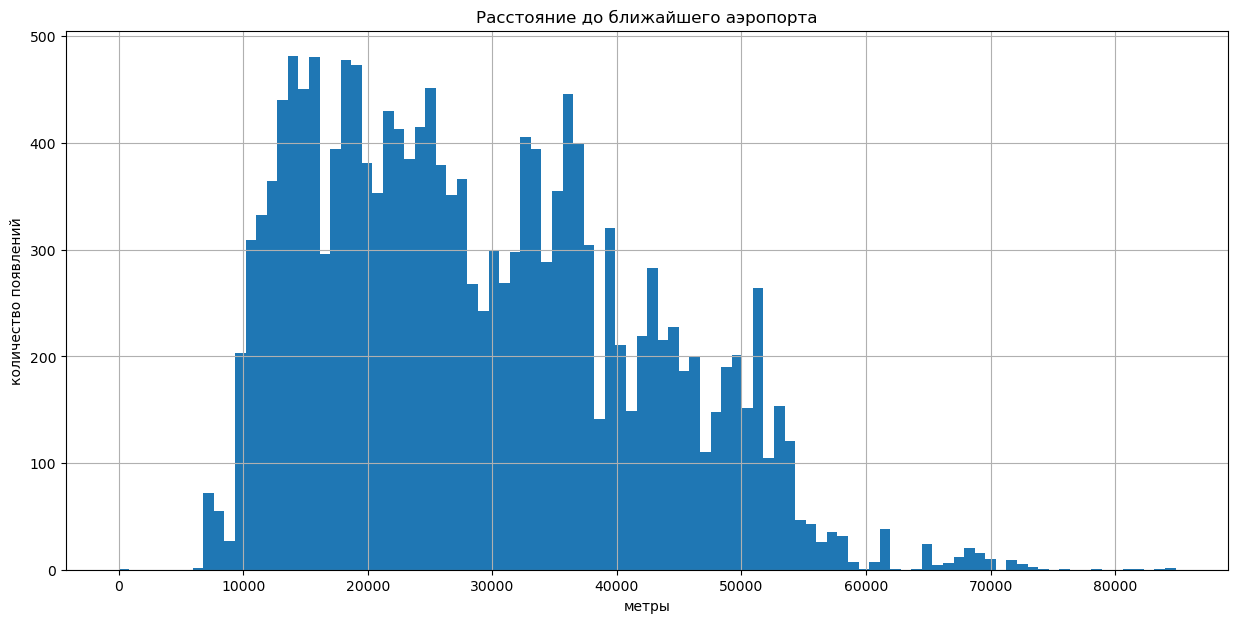

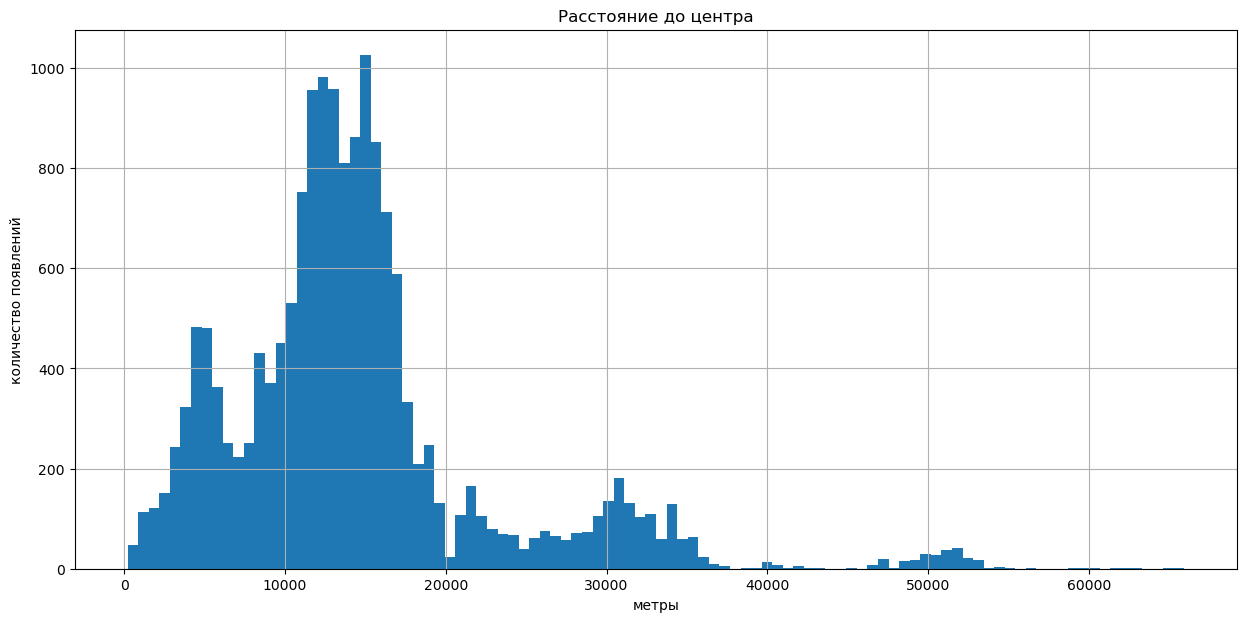

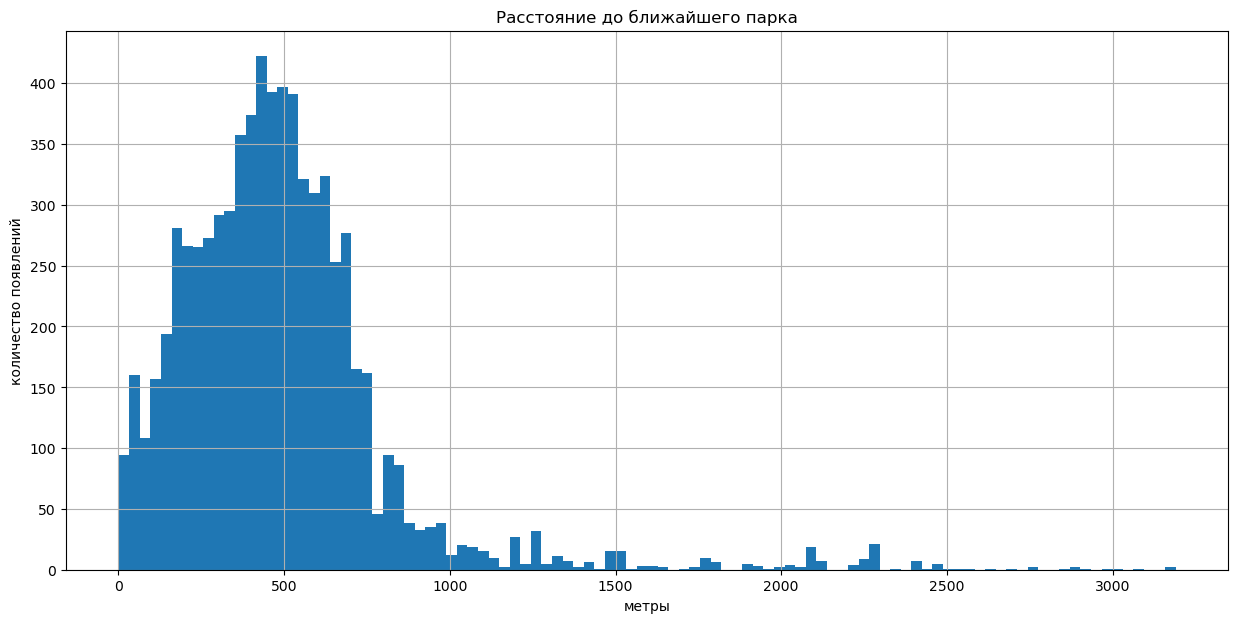

In [85]:
airports_nearest.hist('airports_nearest', bins=100, figsize=(15, 7))
plt.xticks(np.arange(0,85000,10000));
plt.title(r'Расстояние до ближайшего аэропорта')
plt.xlabel('метры')
plt.ylabel(r'количество появлений');

cityCenters_nearest.hist('cityCenters_nearest', bins=100, figsize=(15, 7))
plt.xticks(np.arange(0,70000,10000));
plt.title(r'Расстояние до центра')
plt.xlabel('метры')
plt.ylabel(r'количество появлений');

parks_nearest.hist('parks_nearest', bins=100, figsize=(15, 7))
plt.xticks(np.arange(0,3500,500));
plt.title(r'Расстояние до ближайшего парка')
plt.xlabel('метры')
plt.ylabel(r'количество появлений');


Рассмотрев данные по столбцу `'airports_nearest'` и гистограмме по нему, можно отметить следующее: минимальная расстояние  - 0, максимальное - 84853 м. Гистограмма имеет положительно скошенное распределение, смещенное вправо: среднее (28903.54 м) медиана (26995.00 м). Квартиры на расстоянии свыше 57000 м - очень редки.

Рассмотрев данные по столбцу `'cityCenters_nearest'` и гистограмме по нему, можно отметить следующее: минимальная расстояние  - 208, максимальное - 65952 м. Гистограмма имеет бимодальное распределение, смещенное вправо: среднее (14495.88 м) медиана (13277 м). Квартиры на расстоянии свыше 36000 м - очень редки.

Рассмотрев данные по столбцу `'parks_nearest'` и гистограмме по нему, можно отметить следующее: минимальная расстояние  - 1, максимальное - 3190 м. Гистограмма имеет положительно скошенное распределение, смещенное вправо: среднее (492.36 м) медиана (456 м). Квартиры на расстоянии свыше 1500 м - очень редки.

***Таким образом, изучив параметры всех квартир, можно составить следующий "портрет" характеристик наиболее часто встречающегося объекта недвижимости:***

***Квартира, состоящая из 1 комнаты, общей площадью 45 м2, жилой площадью - 18 м2, и кухни размером 10 м2. Стоимость квартиры - 4.5 млн. руб. Высота потолков - 2.7 м, квартира находится на 2 этаже пятиэтажного дома.***

<a id="analysis2"></a> 
#### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

**Рассмотрим столбец  `'days_exposition'`. Выведем среднее, медиану, а также гистограмму.**

Медиана: 89.0
Среднее: 149.96507965490483


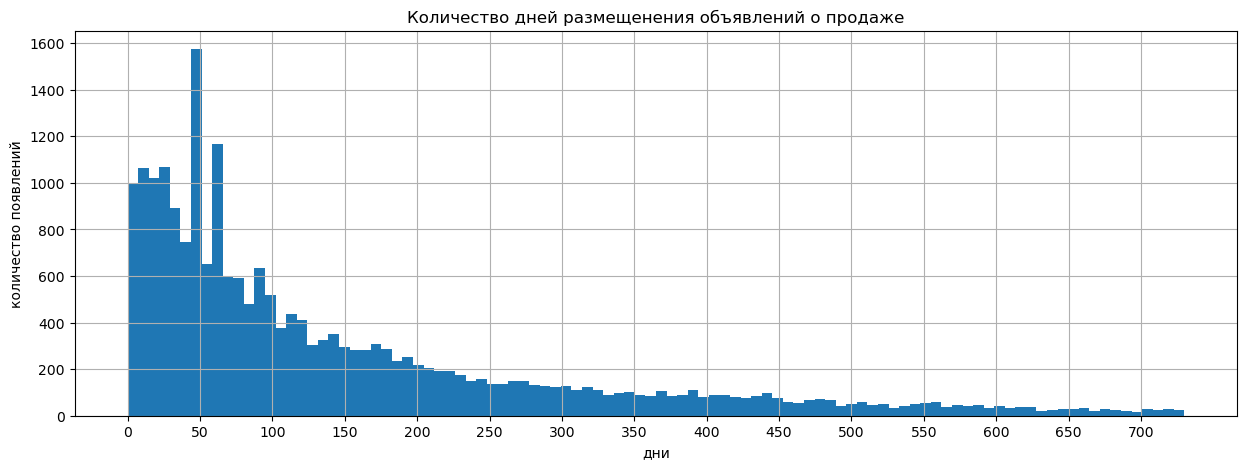

In [86]:
print('Медиана:', filtering_data['days_exposition'].median())
print('Среднее:', filtering_data['days_exposition'].mean())

data.hist('days_exposition',bins=100, figsize=(15, 5))
plt.xticks(np.arange(0,750,50));
plt.title(r'Количество дней размещенения объявлений о продаже')
plt.xlabel('дни')
plt.ylabel(r'количество появлений');
plt.show()

Срок, в который необходимо продать квартиру, определяет, прежде всего, сам продавец. Однако, стандартная продажа квартиры проходит в срок около трех месяцев. Срочная продажа подразумевает реализацию квартиры в срок не более одного месяца. Срочный выкуп — от 3 до 14 дней. Квартиры, продающиеся более полутора лет уже, можно считать необычно долгими.
    
Гистограмма по количеству дней продажи имеет распределение, скошенное вправо. Наибольшее количество продаж находится в диапазоне до 2-2,5 месяцев. Мода значений - 45 дней.

**На гистограмме отчетливо видны 3 наиболее выраженных пика значений. Рассмотрим их подробнее.**

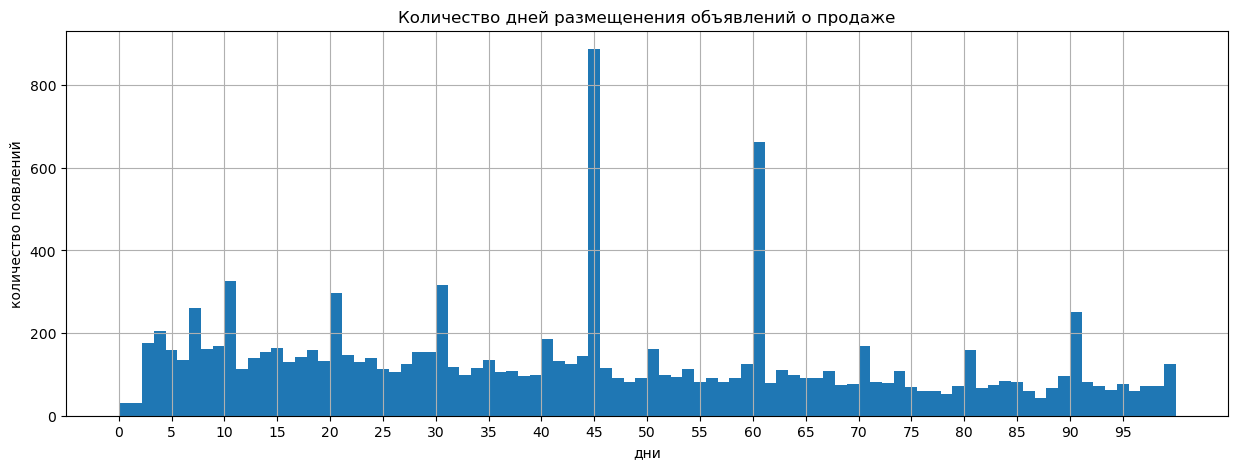

In [87]:
filtering_data.hist('days_exposition', bins=90, range=(0,100), figsize=(15, 5))
plt.xticks(np.arange(0,100,5));
plt.title(r'Количество дней размещенения объявлений о продаже')
plt.xlabel('дни')
plt.ylabel(r'количество появлений');

На  гистограмме можно выделить 2 главных пиковых значения, 45 и 60 дней. Также активные продажи присутствуют на отметках: 7, 11,21,31 и 90 дней.

В условиях размещения объектов недвижимости на сайте можно найти информацию по срокам размещения. В зависимости от суммы продажи объекта недвижимости ему дается бесплатное объявление на срок: квартира	до 4,5 млн — 45 дней, от 4,5 до 10 млн — 60 дней, от 10 млн — 90 дней.
Чтобы проверить имеется ли зависимость от цены и сроком бесплатного объявления, построим диаграмму рассеяния.

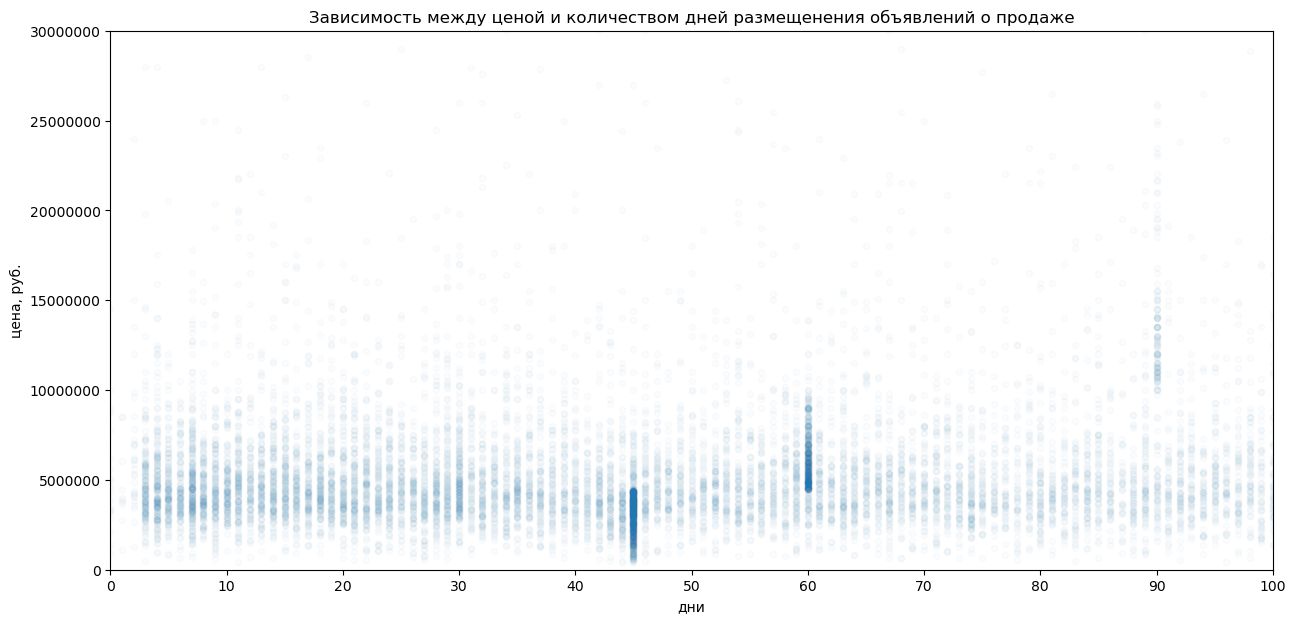

In [88]:
filtering_data.plot(x='days_exposition', y='last_price', xlim=(0,91), ylim=(0,30000000), kind='scatter', alpha=0.02, figsize=(15, 7))
plt.xticks(np.arange(0,101,10));
plt.ticklabel_format(useOffset=False, style='plain') 
plt.title(r'Зависимость между ценой и количеством дней размещенения объявлений о продаже')
plt.xlabel('дни')
plt.ylabel(r'цена, руб.');

На диаграмме четко выражено, что на отметке в 45 дней наибольшая численность объявлений, а также стоимость этих объявлений варьируется до 4,5 млн.руб. Диапазон цен по объявлениям с продажей в 60 дней  составляет от 5 10 млн.руб. На отметке в 90 дней также можно заметить зависимость между ценой свыше 10 млн.руб. и сроком продажи, однако она различима менее всех остальных.

Зависимости между ценой и другими пиковыми значениями дней продажи на диаграмме не выявлено, следовательно они вызваны другими факторами. Можно предположить, что пик в 7 дней, вызван промокодом на премиум аккаунт на 7 дней, пик в 31 день - автопродлением подписки, остальные особенностями по срокам оформления ипотечных сделок.

<a id="analysis3"></a> 
#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

**Выведем корреляцию по всем исследуемым переменным.**

In [89]:
filtering_data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.00,0.78,0.67,0.57,0.48
total_area,0.78,1.00,0.93,0.56,0.79
living_area,0.67,0.93,1.00,0.34,0.87
kitchen_area,0.57,0.56,0.34,1.00,0.23
rooms,0.48,0.79,0.87,0.23,1.00


**Построим диаграмму рассеяния по общей площади и цене объектов недвижимости.**

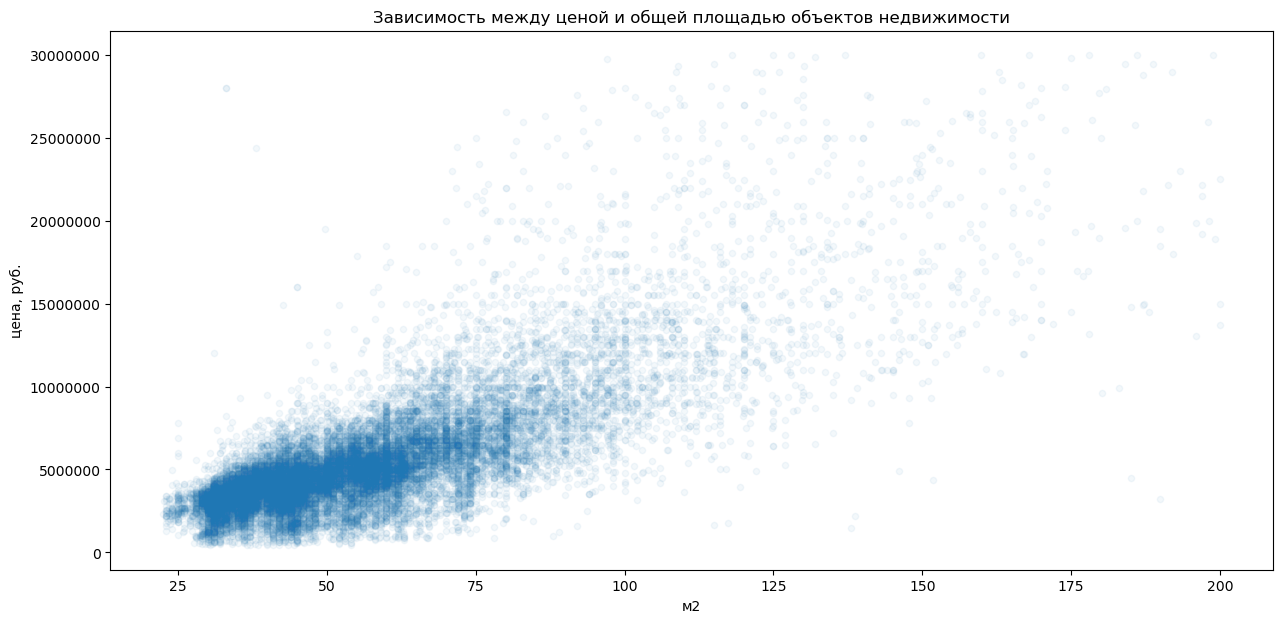

In [90]:
filtering_data.plot(x='total_area', y='last_price',kind='scatter', alpha=0.05, figsize=(15, 7))
plt.ticklabel_format(useOffset=False, style='plain')
plt.title(r'Зависимость между ценой и общей площадью объектов недвижимости')
plt.xlabel('м2')
plt.ylabel(r'цена, руб.');

На основании полученной диаграммы можно проследить, что имеется положительная зависимость между ценой и общей площадью объекта недвижимости. Так при увеличении цены увеличивается и площадь. однако наиболее выражена корреляция на объектах до 100 м2 и стоимостью до 15 млн.руб. При высоких значения одного и/или другого параметра зависимость есть, но она слабо выражена. Вероятно, это связано с тем, что такие объекты не многочисленны и нетипичны.
 

**Построим диаграмму рассеяния по жилой площади и цене объектов недвижимости.**

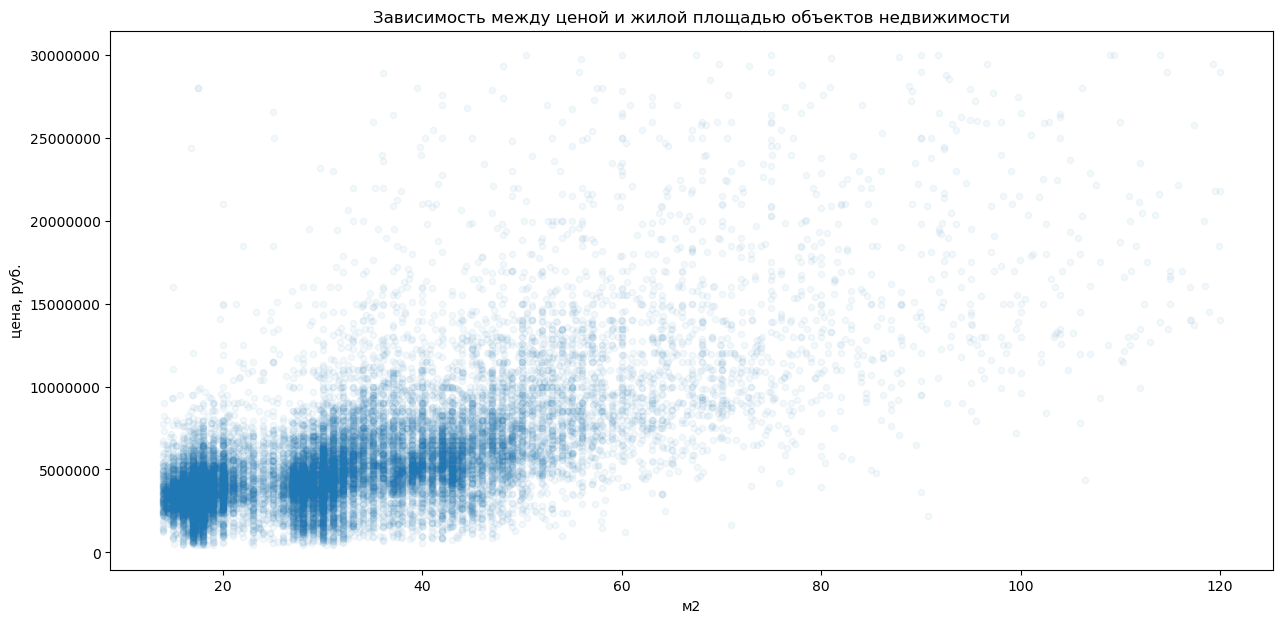

In [91]:
filtering_data.plot(x='living_area', y='last_price',kind='scatter', alpha=0.05, figsize=(15, 7));
plt.ticklabel_format(useOffset=False, style='plain')
plt.title(r'Зависимость между ценой и жилой площадью объектов недвижимости')
plt.xlabel('м2')
plt.ylabel(r'цена, руб.');

Положительная зависимость между ценой и жилой площадью квартир прослеживается, однако она уже менее выражена, чем по предыдущей характеристике-общей площади. Также зависимость отчетливо можно наблюдать до середины цены и жилой площади на диаграмме, далее разброс становится намного хаотичнее.

**Построим диаграмму рассеяния по площади кухни и цене объектов недвижимости.**

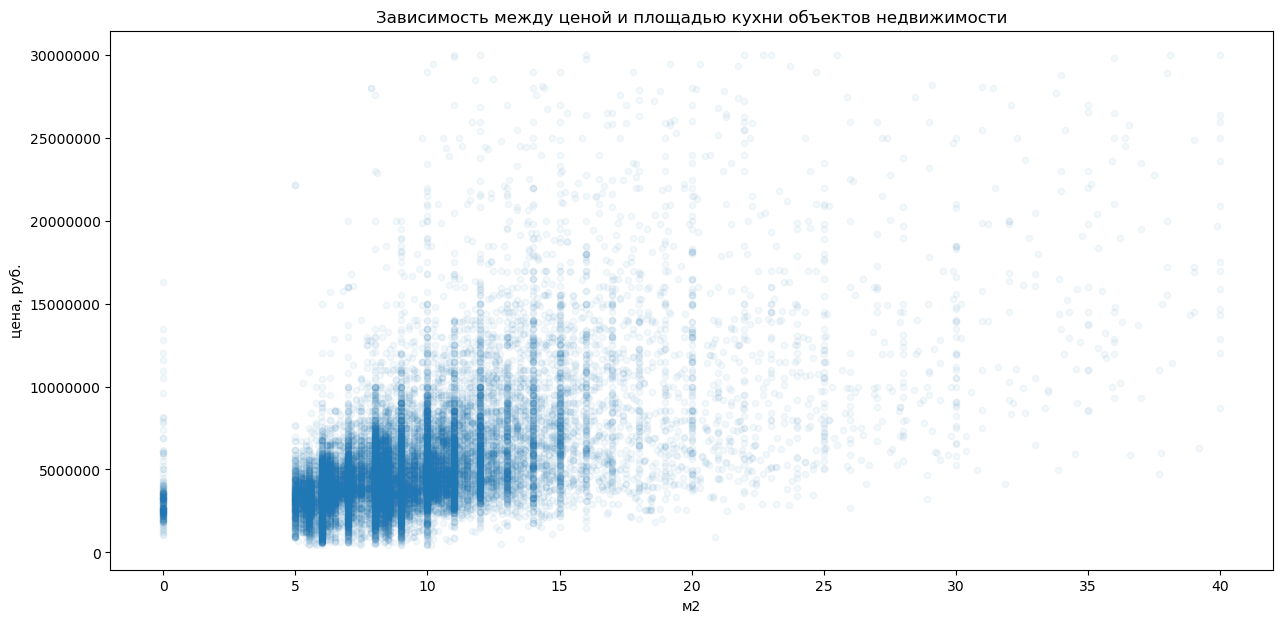

In [92]:
filtering_data.plot(x='kitchen_area', y='last_price',kind='scatter', alpha=0.05, figsize=(15, 7));
plt.ticklabel_format(useOffset=False, style='plain')
plt.title(r'Зависимость между ценой и площадью кухни объектов недвижимости')
plt.xlabel('м2')
plt.ylabel(r'цена, руб.');

Зависимость между площадью кухни и ценой объекта похожа с предыдущими параметрами. Однако так как датафрейм был отсортирован, видно отсутствие значений не допустимых по нормам. Основная корреляция прослеживается на объектах до 10 млн.руб. и площади кухни до 18м2, далее разброс становится хаотичным, не имеющим какой-либо зависимости.

**Рассмотрим зависимость между количеством комнат в квартире стоимостью.**

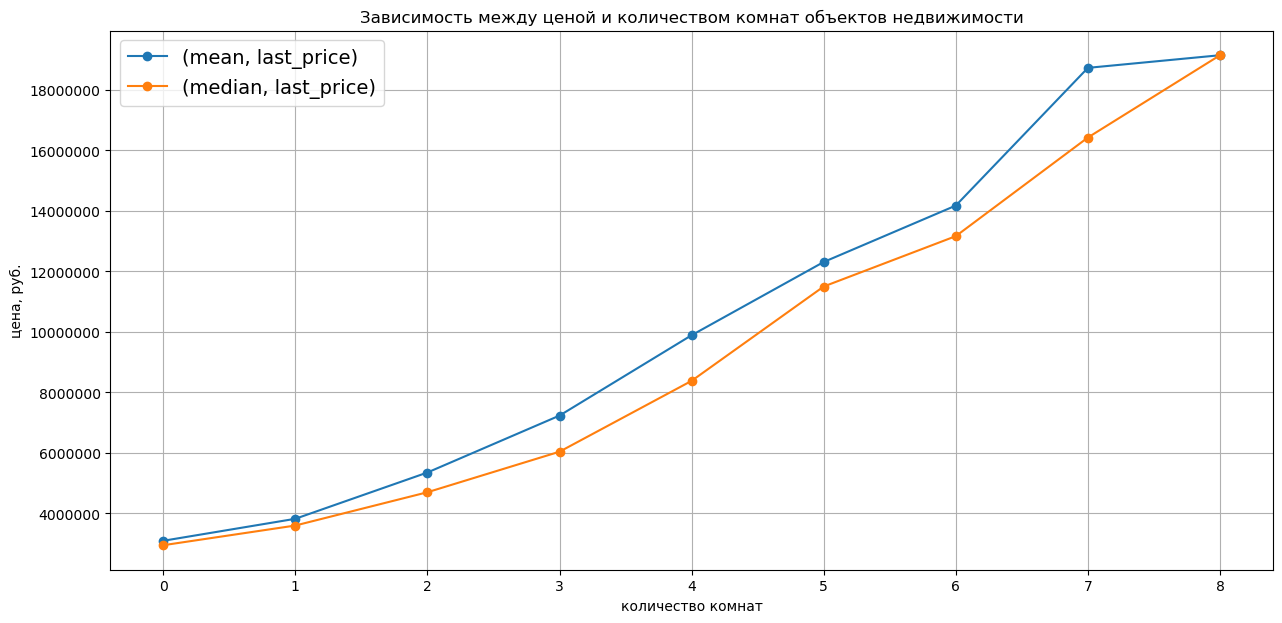

In [93]:
filtering_data.pivot_table(index='rooms', values='last_price', aggfunc = ['mean', 'median'])\
.plot(grid=True, figsize=(15, 7), style='o-')
plt.ticklabel_format(axis='y', useOffset=False, style='plain')
plt.legend(fontsize=14);
plt.title(r'Зависимость между ценой и количеством комнат объектов недвижимости')
plt.xlabel('количество комнат')
plt.ylabel(r'цена, руб.');

На составленом графике можно заменить, что при увеличении количества комнат растет и средняя и медианная стоимость объектов недвижимости. Следовательно можно подтвердить о наличии прямой зависимости между количеством комнат и стоимость квартиры.

**Рассмотрим зависимость между ценой объектов недвижимости и типом этажа.**

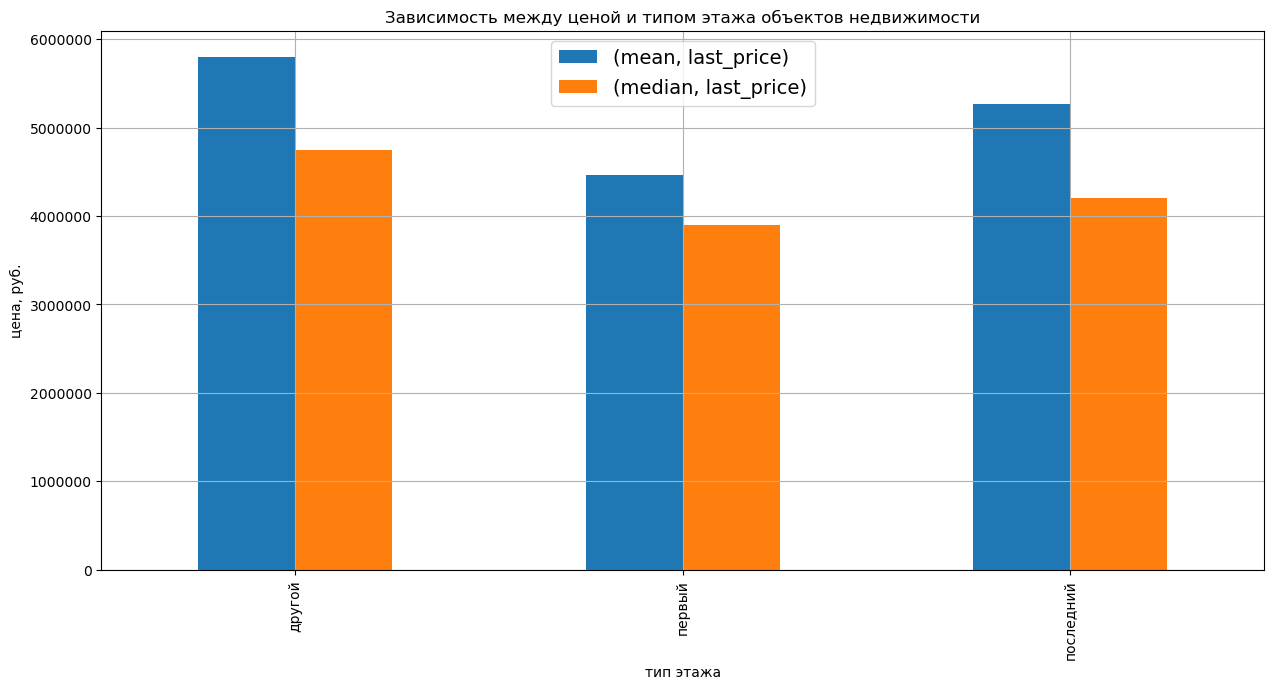

In [94]:
ab = filtering_data.pivot_table(index='floor_type', values='last_price', aggfunc = ['mean', 'median'])\
.plot.bar(grid=True, figsize=(15, 7))
plt.ticklabel_format(axis='y', useOffset=False, style='plain')
plt.legend(fontsize=14);
plt.title(r'Зависимость между ценой и типом этажа объектов недвижимости')
plt.xlabel('тип этажа')
plt.ylabel(r'цена, руб.');

На графике можно заметить, меньшая стоимость объектов недвижимости приходится на первые этажи, а большая стоимость у недвижимости с типом этажа другой (т.е. не первый и не последний). Средняя и медианная стоимости по всем трем типам однородна, и нет каких-либо выбросов. Следовательно, можно сказать, что есть зависимость между типом этажа и ценой, а выражена она так: квартиры на первых этажах стоят дешевле, чем на последних и остальных.

**Рассмотрим зависимость между днем недели, в который было выставлено объявление и стоимостью.**

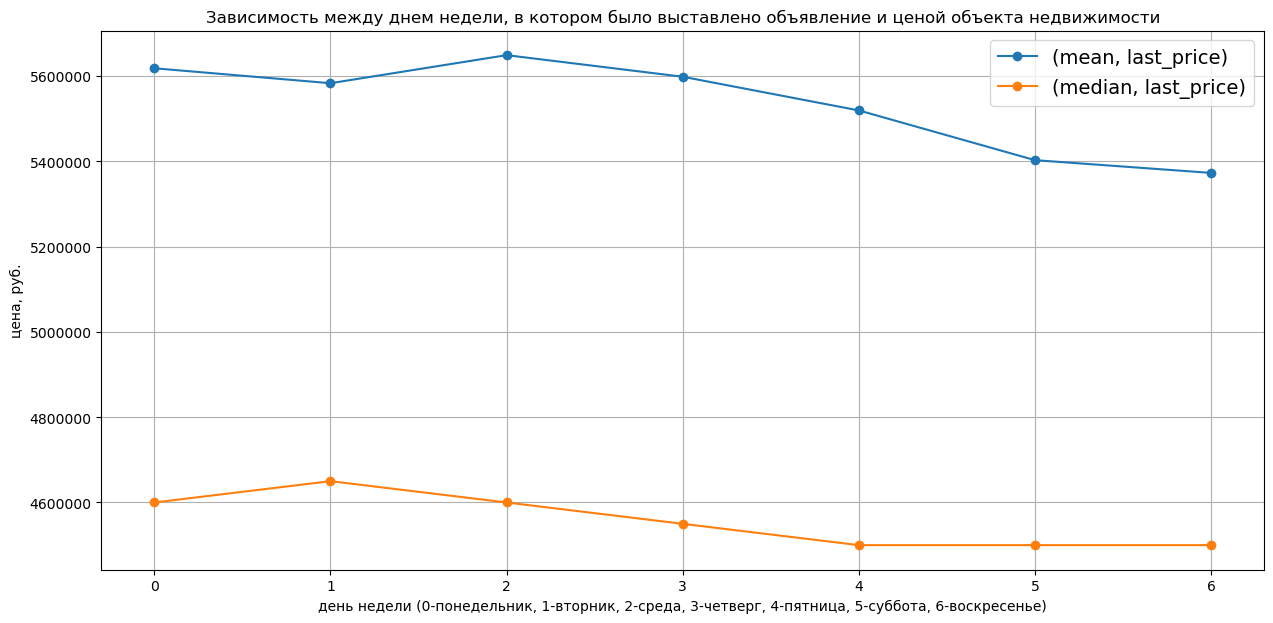

In [95]:
filtering_data.pivot_table(index='weekday', values='last_price', aggfunc = ['mean', 'median'])\
.plot(grid=True, figsize=(15, 7), style='o-')
plt.ticklabel_format(axis='y', useOffset=False, style='plain')
plt.legend(fontsize=14);
plt.title(r'Зависимость между днем недели, в котором было выставлено объявление и ценой объекта недвижимости')
plt.xlabel('день недели (0-понедельник, 1-вторник, 2-среда, 3-четверг, 4-пятница, 5-суббота, 6-воскресенье)')
plt.ylabel(r'цена, руб.');

На графике можно заметить, что средняя и медианная стоимость различаются, приблизительно на 1 млн.руб. Какую-либо зависимость между днем недели и ценой объявления проследить и выявить сложно. Однако есть небольшая особенность, что у объявлений, которые были опубликованы в субботу и воскресенье и медианная и средняя стоимость ниже, чем у объявлений, опубликованных в другие дни. 
Далее отдельно рассматривая среднюю стоимость, по объявлениям, выложенным в среду, она выше всего.
А по медианной стоимости пик приходится на вторник. Таким образом можно сделать вывод, что есть частичная зависимость, а именно, что у объявлений, опубликованных в выходные дни, стоимость объектов недвижимости ниже.

**Рассмотрим зависимость между месяцем, в который было выставлено объявление и стоимостью.**

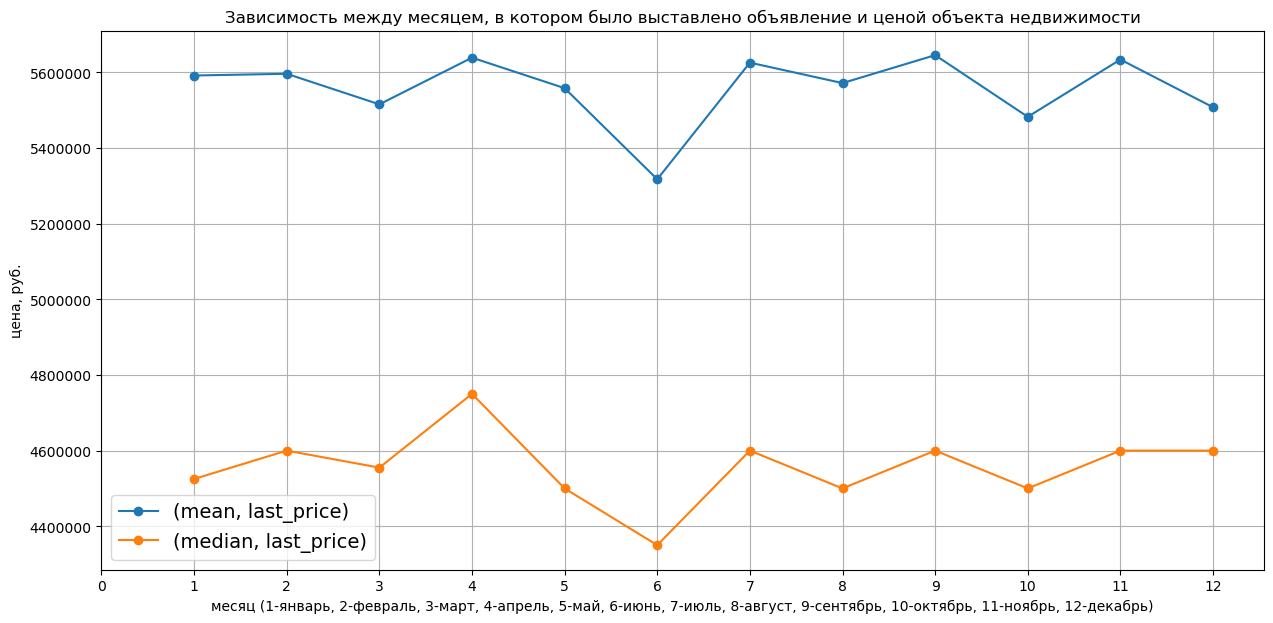

In [96]:
filtering_data.pivot_table(index='month', values='last_price', aggfunc = ['mean', 'median'])\
.plot(grid=True, figsize=(15, 7), style='o-')
plt.ticklabel_format(axis='y', useOffset=False, style='plain')
plt.xticks(np.arange(0, 13, 1))
plt.legend(fontsize=14);
plt.title(r'Зависимость между месяцем, в котором было выставлено объявление и ценой объекта недвижимости')
plt.xlabel('месяц (1-январь, 2-февраль, 3-март, 4-апрель, 5-май, 6-июнь, 7-июль, 8-август, 9-сентябрь, 10-октябрь, 11-ноябрь, 12-декабрь)')
plt.ylabel(r'цена, руб.');

Исходя из представленных на графике данных, можно сказать, о том, что зависимости между месяцем, в котором было опубликовано объявление и ценой недвижимости нет, стоимость в разные месяцы идет то вверх, то вниз. Однако из всех месяцев стоит выделить апрель - в нем самое высокое значение цены и июнь - с самым низким значением.

**Рассмотрим зависимость между годом, в который было выставлено объявление и стоимостью.**

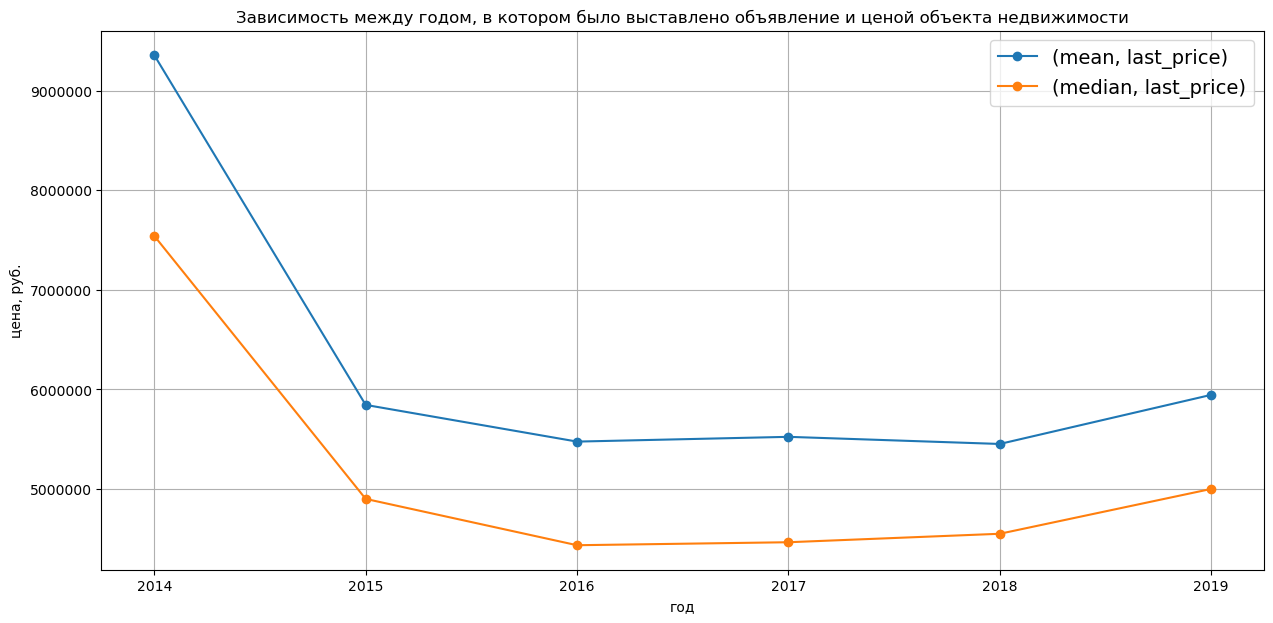

In [97]:
filtering_data.pivot_table(index='year', values='last_price', aggfunc = ['mean', 'median'])\
.plot(grid=True, figsize=(15, 7), style='o-')
plt.ticklabel_format(axis='y', useOffset=False, style='plain')
plt.legend(fontsize=14)
plt.title(r'Зависимость между годом, в котором было выставлено объявление и ценой объекта недвижимости')
plt.xlabel('год')
plt.ylabel(r'цена, руб.');

На диаграмме можно увидеть, что самая высокая стоимость на недвижимость приходилась на 2014 год, скорее всего это было вызвано нестабильной экономикой в стране, большим количеством санкций на Россию, и резким снижением рубля как валюты. К 2016 году цены снизились и снова стали увеличиваться. Зависимость между годом продажи недвижимости и стоимостью имеется и вызвана она, в основном, экономическими факторами.

**Рассматривая зависимость между различными параметрами объектов недвижимости и их ценой, было выявлено следующее:**

- наблюдается положительная зависимость между общей площадью объекта и ценой, корреляция составляет 0,78

- наблюдается положительная зависимость между жилой площадью и ценой объекта недвижимости, корреляция составляет 0,67

- наблюдается зависимость между площадью кухни объекта и его ценой, корреляция составляет 0,57

- прослеживается зависимость между количеством комнат и ценой объекта недвижимости, корреляция составляет 0,48

- выявлена зависимость между типом этажа и ценой, и выражена она так: квартиры на первых этажах стоят дешевле, чем на последних и других

- имеется частичная зависимость между днем недели публикации объявления и ценой объекта недвижимости, а именно, что у объявлений, опубликованных в выходные дни, стоимость объектов недвижимости ниже

- зависимости между месяцем, в котором было опубликовано объявление и ценой недвижимости нет, стоимость в разные месяцы идет то вверх, то вниз. Однако из всех месяцев стоит выделить апрель - в нем самое высокое значение цены и июнь - с самым низким значением

- зависимость между годом продажи недвижимости и стоимостью имеется и вызвана она, в основном, экономическими факторами.

<a id="analysis4"></a> 
#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [98]:
minmax = filtering_data.pivot_table(index='locality_name', values= 'price_m2', aggfunc=['count', 'mean'])
minmax = minmax.reset_index()
minmax.columns = ['Населенный пункт', 'Количество объявлений', 'Средняя цена м2']
minmax10 = minmax.sort_values(by='Количество объявлений', ascending=False).head(10)
display(minmax10)

,Населенный пункт,Количество объявлений,Средняя цена м2
221,Санкт-Петербург,14380,110004.09
145,Мурино,538,85586.38
105,Кудрово,436,95352.80
293,Шушары,426,78555.94
34,Всеволожск,370,68861.77
200,Пушкин,339,102335.77
89,Колпино,328,75172.50
168,Парголово,316,90161.83
42,Гатчина,290,68958.80
35,Выборг,221,58019.66


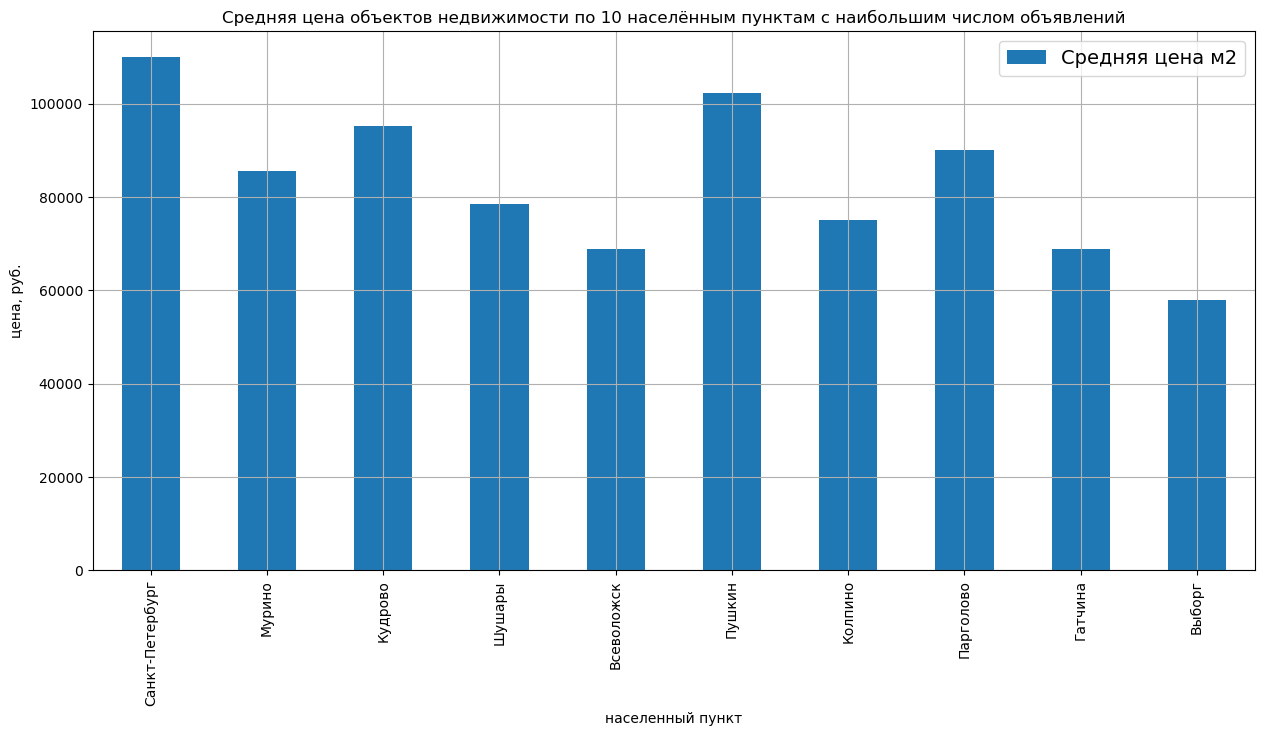

In [99]:
minmax10.plot.bar(y='Средняя цена м2', x='Населенный пункт', grid=True, figsize=(15, 7))
plt.legend(fontsize=14)
plt.title(r'Средняя цена объектов недвижимости по 10 населённым пунктам с наибольшим числом объявлений')
plt.xlabel('населенный пункт')
plt.ylabel(r'цена, руб.');

Выведем названия населенных пунктов с наибольшей и наименьшей стоимостью за метр квадратный среди 10.

In [100]:
display(minmax10[minmax10['Средняя цена м2'] == minmax10['Средняя цена м2'].min()])
                                      #минимальное значение среди десяти пуселенных пунктов с наибольшим числом объявлений
display(minmax10[minmax10['Средняя цена м2'] == minmax10['Средняя цена м2'].max()])
                                     #максимальное значение среди десяти пуселенных пунктов с наибольшим числом объявлений

,Населенный пункт,Количество объявлений,Средняя цена м2
35,Выборг,221,58019.66


,Населенный пункт,Количество объявлений,Средняя цена м2
221,Санкт-Петербург,14380,110004.09


Выведем названия населенных пунктов с наибольшей и наименьшей стоимостью за метр квадратный по всему датафрейму.

In [101]:
display(minmax[minmax['Средняя цена м2'] == minmax['Средняя цена м2'].min()])#максимальное значение по всему датафрейму                                                                 
display(minmax[minmax['Средняя цена м2'] == minmax['Средняя цена м2'].max()])#минимальное значение по всему датафрейму

,Населенный пункт,Количество объявлений,Средняя цена м2
248,Старополье,3,11206.22


,Населенный пункт,Количество объявлений,Средняя цена м2
122,Лисий Нос,2,113728.35


Из всего датафрейма можно выделить, что населенный пункт с наименьшей стоимостью за квадратный метр - Старополье (11206.22 руб.), с наибольшей - Лисий Нос (113728.35 руб.).

Самым многочисленны, по выставленным на продажу объектам недвижимости является Санкт-Петербург, средняя стоимость за м2 составляет 110004.09 руб.


<a id="analysis5"></a> 
#### Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

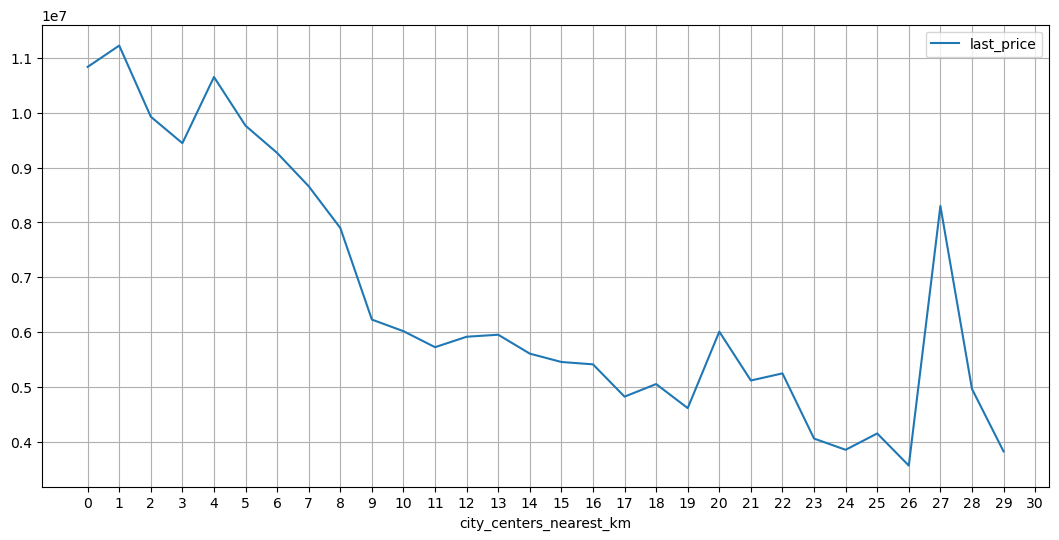

In [102]:
mean_spb = filtering_data.query('(locality_name == "Санкт-Петербург") and (city_centers_nearest_km != 666)')\
.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
mean_spb.plot(grid=True, figsize=(13, 6))
plt.xticks(np.arange(0,31,1));

В общем на графике при наибольшей удаленности от центра города прослеживается тенденция к постепенному снижению. Однако на 4 км стоимость немного возрастает, и опять снижается до 20 км. Однако на отметке в 27 км имеется уже высокий подъем стоимости. Можно предположить, что такой перепад вызван находящимся поблизости значимым объектом культурного наследия.  

<a id="rec"></a> 
### Выводы по исследованию.

**Подводя итоги по исследуемому, датафрейму, можно сделать следующие выводы:**

В данных представлены различные объекты недвижимости, с очень большими разбросами значений. Для проведения анализа было необходимо устранить аномальные и сильно выбивающиеся значения. В основном были убраны строки с нетипично большими по площади объектами недвижимости, большим количеством дней продажи объекта недвижимости, а также с крайне высокой ценой.

Проанализировав различные параметры объектов недвижимости можно выделить, что **наиболее популярны для продажи 1-комнатные квартиры, общей площадью около 45 м2, жилой площадью - 18 м2, и кухней - 10 м2, стоимостью 4,5 млн.руб. Находящиеся в 5 этажном доме не на первом и не на последнем этажах.**

Большее количество объявлений о продаже выкладывается на сайт во вторник и четверг, а наименьшее в выходные дни - суббота и воскресенье. В мае и январе количество объявлений значительно ниже, чем в другие месяцы. Больше всего объявлений приходится на март и февраль.

Количество дней продажи имеет очень большой разброс, в датафрейме есть строки, в которых дни продажи достигают 1600 дней. В нашем датафрейме можно выделить 3 пиковых значения по продаже недвижимости: 45, 60 и 90 дней. Связаны они с особыми правилами размещения объявлений на сайте и зависят от стоимости объектов.

Также **была выявлена прямая зависимость между общей площадью объекта недвижимости и его ценой, жилой площадью и ценой, площадью кухни и ценой, а также количеством комнат и ценой.** Так при увеличении значений каждого из параметров увеличивается и стоимость. **Наибольшая корреляция отмечается между общей площадью и ценой и составляет - 0,78, а наименьшая - между количеством комнат в квартире и стоимостью (0,48).**

По категориальным переменным - тип этажа, день недели, месяц, и год публикации объявления о продаже недвижимости и их зависимостью между ценой было выявлено следующее:
**- выявлена зависимость между типом этажа и ценой, и выражена она так: квартиры на первых этажах стоят дешевле, чем на последних и других;**

- имеется частичная зависимость между днем недели публикации объявления и ценой объекта недвижимости, а именно, что у объявлений, опубликованных в выходные дни, стоимость объектов недвижимости ниже;

- зависимости между месяцем, в котором было опубликовано объявление и ценой недвижимости нет, стоимость в разные месяцы идет то вверх, то вниз. Однако из всех месяцев стоит выделить апрель - в нем самое высокое значение цены, и июнь - с самым низким значением;

- зависимость между годом продажи недвижимости и стоимостью имеется и вызвана она, в основном, экономическими факторами.

**В датафрейме были выделены 10 населенных пунктов с наибольшим количеством объявлений о продаже. Лидирующую позицию, безусловно, занимает Санкт-Петербург, так средняя цена за квадратный метр здесь составляет 110004.09 руб. Также в 10 вошли: Мурино, Кудрово, Шушары, Всеволожск, Пушкин, Колпино, Парголово, Гатчина и Выборг, цена за квадратный метр в этих населенных пунктах варьируется от 102335.77 до 58019.66 руб.**

**По Санкт-Петербургу была рассчитана средняя стоимость каждого километра до центра города. Так стоимость одного километра в самом центре города составляет 1,1 млн.руб и далее идет на уменьшение, например, 29 км уже имеет стоимость в 400 тыс.руб.**

Подытожив, можно с уверенностью сказать, что рынок недвижимости Санкт-Петербурга и области очень разнообразен и насыщен предложениями под каждого покупателя.
